## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv file

smmh_raw = pd.read_csv ('/content/drive/MyDrive/ITD214 - APPLIED DATA SCIENCE PROJECT/Project/smmh.csv')

In [ ]:
print(smmh_raw.shape)
smmh_raw.head(10)

(481, 21)


,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
5,4/18/2022 19:33:48,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,2,3,4,3,4,4,3,3,2,4
6,4/18/2022 19:36:12,21.0,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,...,2,2,4,3,5,3,4,5,5,3
7,4/18/2022 19:36:17,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,3,3,3,1,1,3,1,5,5,1
8,4/18/2022 19:39:36,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,...,3,3,1,1,1,3,1,5,5,1
9,4/18/2022 19:41:34,20.0,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
print(smmh_raw.dtypes)

Timestamp                                                                                                                object
1. What is your age?                                                                                                    float64
2. Gender                                                                                                                object
3. Relationship Status                                                                                                   object
4. Occupation Status                                                                                                     object
5. What type of organizations are you affiliated with?                                                                   object
6. Do you use social media?                                                                                              object
7. What social media platforms do you commonly use?                                                     

## Data Cleaning

In [ ]:
print(smmh_raw.columns.tolist())

['Timestamp', '1. What is your age?', '2. Gender', '3. Relationship Status', '4. Occupation Status', '5. What type of organizations are you affiliated with?', '6. Do you use social media?', '7. What social media platforms do you commonly use?', '8. What is the average time you spend on social media every day?', '9. How often do you find yourself using Social media without a specific purpose?', '10. How often do you get distracted by Social media when you are busy doing something?', "11. Do you feel restless if you haven't used Social media in a while?", '12. On a scale of 1 to 5, how easily distracted are you?', '13. On a scale of 1 to 5, how much are you bothered by worries?', '14. Do you find it difficult to concentrate on things?', '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', '16. Following the previous question, how do you feel about these comparisons, generally speaking?', '17. How often do you look to seek

In [ ]:
# Define the column renaming dictionary
rename_columns = {
    "1. What is your age?": "age",
    "2. Gender": "gender",
    "3. Relationship Status": "relationship_status",
    "4. Occupation Status": "occupation_status",
    "5. What type of organizations are you affiliated with?": "organization_type",
    "6. Do you use social media?": "uses_social_media",
    "7. What social media platforms do you commonly use?": "social_media_platforms_used",
    "8. What is the average time you spend on social media every day?": "avg_social_media_time",
    "9. How often do you find yourself using Social media without a specific purpose?": "frequency_mindless_use",
    "10. How often do you get distracted by Social media when you are busy doing something?": "distraction_while_busy",
    "11. Do you feel restless if you haven't used Social media in a while?": "restlessness_without_social_media",
    "12. On a scale of 1 to 5, how easily distracted are you?": "distraction_level",
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "worry_level",
    "14. Do you find it difficult to concentrate on things?": "difficulty_concentrating",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "social_comparison_frequency",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "feelings_about_comparisons",
    "17. How often do you look to seek validation from features of social media?": "validation_seeking_frequency",
    "18. How often do you feel depressed or down?": "feeling_depressed_frequency",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "interest_fluctuation",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "sleep_issues_frequency"
}

# Apply the renaming and save as a new DataFrame variable
smmh_clean = smmh_raw.rename(columns=rename_columns)


Measurements of Frequency or Intensity of mental health symptoms is take through Likert Scale questions (Extracted from dataset)

1.   Purposeless use of Social Media [ADHD] - Question 9
2.   Distracted by Social Media [ADHD] - Question 10
3. Restlessness if Social Media not used [Anxiety] - Question 11
4. Ease of Distraction by Social Media [ADHD] - Question 12
5. Bothered by worries [Anxiety] - Question 13
6. Difficulty in concentrating [ADHD] - Question 14
7. Comparison of self to peers [Self Esteem] - Question 15
8. Feelings about above comparison [Self Esteem] - Question 16
9. Validation sought from Social Media [Self Esteem] - Question 17
10. Feelings of Depression [Depression] - Question 18
11. Fluctuation of interest [Depression] - Question 19
12. Sleep Issues [Depression] - Question 20



In [ ]:
smmh_clean

,Timestamp,age,gender,relationship_status,occupation_status,organization_type,uses_social_media,social_media_platforms_used,avg_social_media_time,frequency_mindless_use,...,restlessness_without_social_media,distraction_level,worry_level,difficulty_concentrating,social_comparison_frequency,feelings_about_comparisons,validation_seeking_frequency,feeling_depressed_frequency,interest_fluctuation,sleep_issues_frequency
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [ ]:
# Strip whitespace and remove newlines from all column names
smmh_raw.columns = smmh_raw.columns.str.strip().str.replace('\n', '', regex=True)
smmh_clean = smmh_raw.rename(columns=rename_columns)

In [ ]:
print ("Rows     : " , smmh_clean.shape[0])
print ("Columns  : " , smmh_clean.shape[1])
print ("\nFeatures : \n" ,smmh_clean.columns.tolist())
print ("\nMissing values :  ", smmh_clean.isnull().sum().values.sum())
print ("\nUnique values :  \n", smmh_clean.nunique())

Rows     :  481
Columns  :  21

Features : 
 ['Timestamp', 'age', 'gender', 'relationship_status', 'occupation_status', 'organization_type', 'uses_social_media', 'social_media_platforms_used', 'avg_social_media_time', 'frequency_mindless_use', 'distraction_while_busy', 'restlessness_without_social_media', 'distraction_level', 'worry_level', 'difficulty_concentrating', 'social_comparison_frequency', 'feelings_about_comparisons', 'validation_seeking_frequency', 'feeling_depressed_frequency', 'interest_fluctuation', 'sleep_issues_frequency']

Missing values :   30

Unique values :  
 Timestamp                            480
age                                   46
gender                                 9
relationship_status                    4
occupation_status                      4
organization_type                     18
uses_social_media                      2
social_media_platforms_used          125
avg_social_media_time                  6
frequency_mindless_use                 5
di

In [ ]:
# Check for null values
smmh_clean.isnull().sum()

,0
Timestamp,0
age,0
gender,0
relationship_status,0
occupation_status,0
organization_type,30
uses_social_media,0
social_media_platforms_used,0
avg_social_media_time,0
frequency_mindless_use,0


In [ ]:
# count number of unique values: Only 7 entries in the column "gender" that are not male/female. Rename to others since might not be useful for analysis due to small count.

smmh_clean.gender.value_counts()

,count
gender,
Female,263
Male,211
Nonbinary,1
Non-binary,1
NB,1
unsure,1
Trans,1
Non binary,1
There are others???,1


In [ ]:
print(smmh_clean['gender'].unique())


['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


In [ ]:
# Renaming the "Others" gender variable
smmh_clean['gender_clean'] = smmh_clean['gender'].apply(lambda x: x if x in ['Male', 'Female'] else 'Other')
smmh_clean = smmh_clean[smmh_clean['gender_clean'].isin(['Male', 'Female'])].copy()


In [ ]:
#convert age to integer

smmh_clean['age'] = smmh_clean['age'].astype(int)

In [ ]:
print(smmh_clean.dtypes)


Timestamp                            object
age                                   int64
gender                               object
relationship_status                  object
occupation_status                    object
organization_type                    object
uses_social_media                    object
social_media_platforms_used          object
avg_social_media_time                object
frequency_mindless_use                int64
distraction_while_busy                int64
restlessness_without_social_media     int64
distraction_level                     int64
worry_level                           int64
difficulty_concentrating              int64
social_comparison_frequency           int64
feelings_about_comparisons            int64
validation_seeking_frequency          int64
feeling_depressed_frequency           int64
interest_fluctuation                  int64
sleep_issues_frequency                int64
gender_clean                         object
dtype: object


In [ ]:
smmh_clean.organization_type.value_counts()

,count
organization_type,
University,237
Private,60
School,42
Company,29
"University, Company",19
"University, Private",16
"School, University",9
"Company, Private",7
Goverment,6


In [ ]:
# Get the mode of the 'organization_type' column
mode_value = smmh_clean['organization_type'].mode()[0]

# Fill missing values with the mode
smmh_clean.fillna({'organization_type': mode_value}, inplace=True)


In [ ]:
smmh_clean

,Timestamp,age,gender,relationship_status,occupation_status,organization_type,uses_social_media,social_media_platforms_used,avg_social_media_time,frequency_mindless_use,...,distraction_level,worry_level,difficulty_concentrating,social_comparison_frequency,feelings_about_comparisons,validation_seeking_frequency,feeling_depressed_frequency,interest_fluctuation,sleep_issues_frequency,gender_clean
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,5,2,5,2,3,2,5,4,5,Male
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,4,5,4,5,1,1,5,4,5,Female
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,2,5,4,3,3,1,4,2,5,Female
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,3,5,3,5,1,2,4,3,2,Female
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,5,5,3,3,3,4,4,1,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,3,4,4,2,4,3,4,4,Male
477,5/22/2022 0:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,3,4,4,4,2,4,4,4,1,Female
478,5/22/2022 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,3,2,3,3,3,4,2,2,2,Female
479,7/14/2022 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,3,3,2,2,3,4,4,5,4,Male


In [ ]:
# Remove rows where participants don't use social media

smmh_clean = smmh_clean[smmh_clean["uses_social_media"]!= "No"]

In [ ]:
smmh_clean.drop(['organization_type','feelings_about_comparisons','uses_social_media'], axis=1)

,Timestamp,age,gender,relationship_status,occupation_status,social_media_platforms_used,avg_social_media_time,frequency_mindless_use,distraction_while_busy,restlessness_without_social_media,distraction_level,worry_level,difficulty_concentrating,social_comparison_frequency,validation_seeking_frequency,feeling_depressed_frequency,interest_fluctuation,sleep_issues_frequency,gender_clean
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,2,5,4,5,Male
1,4/18/2022 19:19:28,21,Female,Single,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,5,4,5,Female
2,4/18/2022 19:25:59,21,Female,Single,University Student,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,1,4,2,5,Female
3,4/18/2022 19:29:43,21,Female,Single,University Student,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,2,4,3,2,Female
4,4/18/2022 19:33:31,21,Female,Single,University Student,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,4,1,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24,Male,Single,Salaried Worker,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,4,3,4,4,Male
477,5/22/2022 0:01:05,26,Female,Married,Salaried Worker,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,4,4,4,1,Female
478,5/22/2022 10:29:21,29,Female,Married,Salaried Worker,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,4,2,2,2,Female
479,7/14/2022 19:33:47,21,Male,Single,University Student,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,4,4,5,4,Male


In [ ]:
smmh_clean.isnull().sum()

,0
Timestamp,0
age,0
gender,0
relationship_status,0
occupation_status,0
organization_type,0
uses_social_media,0
social_media_platforms_used,0
avg_social_media_time,0
frequency_mindless_use,0


### Feature Engineering

#### Platform Count

In [ ]:
platforms_lists = smmh_clean['social_media_platforms_used'].dropna().str.split(r',\s*')
all_platforms = [platform.strip() for sublist in platforms_lists for platform in sublist]
unique_platforms = set(all_platforms)

print("Unique social media platforms used:")
print(unique_platforms)


Unique social media platforms used:
{'Snapchat', 'Twitter', 'YouTube', 'Reddit', 'Pinterest', 'Discord', 'Instagram', 'TikTok', 'Facebook'}


In [ ]:
# Split the comma-separated strings into lists
smmh_clean.loc[:, 'platforms_list'] = smmh_clean['social_media_platforms_used'].dropna().str.split(r',\s*')

# Explode the list so each row has one platform
df_exploded = smmh_clean.explode('platforms_list')

# Create one-hot encoded (dummy) variables
dummies = pd.get_dummies(df_exploded['platforms_list'])

# Combine dummy variables back to original users using groupby
platform_dummies = dummies.groupby(df_exploded.index).max()

# Join the one-hot encoded columns back to the original DataFrame
smmh_clean = smmh_clean.join(platform_dummies)

# Drop the intermediate list column
smmh_clean.drop(columns=['platforms_list'], inplace=True)

# Count the number of platforms used per respondent
platform_cols = platform_dummies.columns.tolist()  # All the platform dummy columns
smmh_clean['platform_count'] = smmh_clean[platform_cols].sum(axis=1)


In [ ]:
# Platform Count
if 'platform_count' in smmh_clean.columns:
    digital_features = []
    digital_features.append('platform_count')

    # Mutually exclusive binary categories
    smmh_clean['single_platform'] = (smmh_clean['platform_count'] == 1).astype(int)
    smmh_clean['multi_platform'] = ((smmh_clean['platform_count'] >= 2) &
                                   (smmh_clean['platform_count'] <= 3)).astype(int)
    smmh_clean['platform_diversity_high'] = (smmh_clean['platform_count'] >= 4).astype(int)

    # Add them to digital_features
    digital_features.extend(['single_platform',
                             'multi_platform', 'platform_diversity_high'])

In [ ]:
print(smmh_clean[['Pinterest', 'TikTok', 'Facebook', 'Discord', 'Reddit', 'Twitter', 'YouTube', 'Instagram', 'Snapchat']].sum())


Pinterest    143
TikTok        90
Facebook     404
Discord      195
Reddit       120
Twitter      128
YouTube      404
Instagram    353
Snapchat     178
dtype: int64


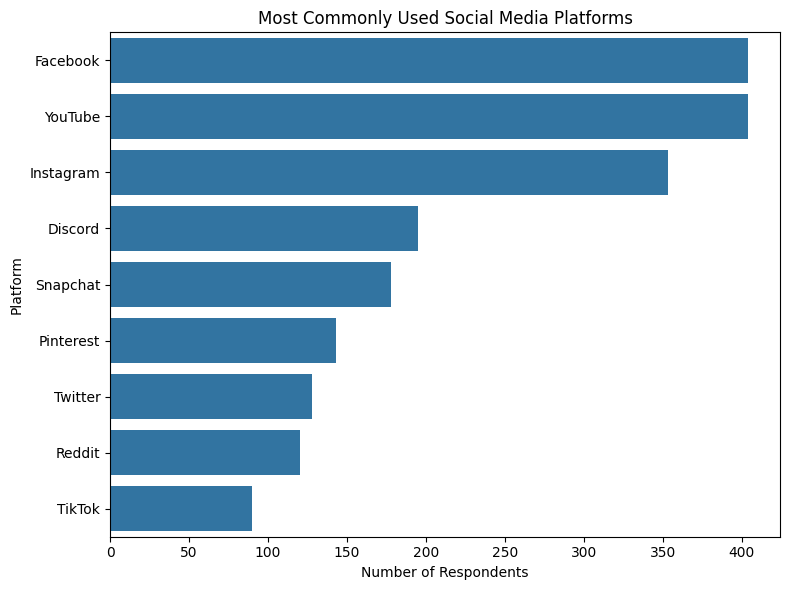

In [ ]:
# List of platform columns
platform_cols = ['Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube', 'Discord']

# Count Trues
platform_counts = smmh_clean[platform_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.values, y=platform_counts.index)
plt.title('Most Commonly Used Social Media Platforms')
plt.xlabel('Number of Respondents')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

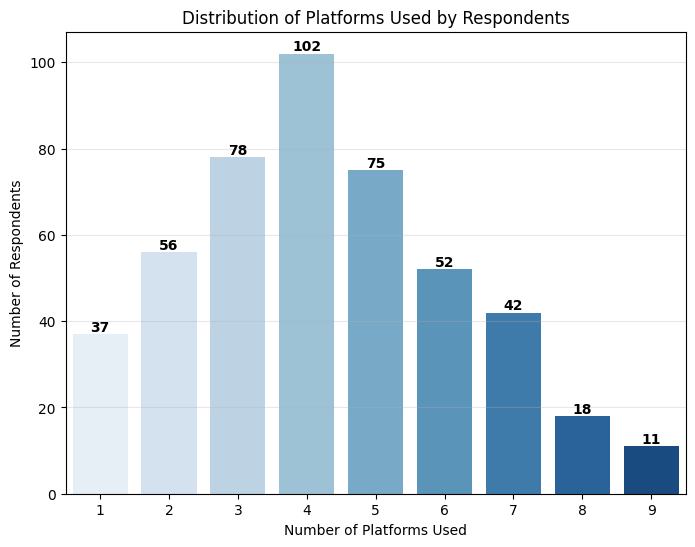

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of Platforms Used by Respondents
plt.figure(figsize=(8,6))
ax = plt.gca()

sns.countplot(
    data=smmh_clean,
    x='platform_count',
    palette='Blues',
    ax=ax
)

# Add labels above bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

# Labels and title
ax.set_xlabel('Number of Platforms Used')
ax.set_ylabel('Number of Respondents')
ax.set_title('Distribution of Platforms Used by Respondents')
ax.grid(axis='y', alpha=0.3)

plt.show()


In [ ]:
smmh_clean

,Timestamp,age,gender,relationship_status,occupation_status,organization_type,uses_social_media,social_media_platforms_used,avg_social_media_time,frequency_mindless_use,...,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube,platform_count,single_platform,multi_platform,platform_diversity_high
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,False,True,False,False,True,True,6,0,0,1
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,False,True,False,False,True,True,6,0,0,1
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,True,False,False,False,False,True,4,0,0,1
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,False,False,False,False,False,False,2,0,1,0
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,False,False,False,False,False,True,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,False,False,False,False,False,True,3,0,1,0
477,5/22/2022 0:01:05,26,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,False,False,False,False,False,True,2,0,1,0
478,5/22/2022 10:29:21,29,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,False,False,False,False,False,True,2,0,1,0
479,7/14/2022 19:33:47,21,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,True,False,False,False,True,True,6,0,0,1


In [ ]:
smmh_clean.drop(['social_media_platforms_used'], axis=1, inplace=True)

#### Usage intensity categories (based on time spent)

In [ ]:
# Convert daily time spent to numerical hours
def convert_time_to_hours(time_str):
    if pd.isna(time_str):
        return np.nan
    time_str = str(time_str).lower().strip()

    if 'less than an hour' in time_str or 'less than 1' in time_str:
        return 0.5
    elif 'between 1 and 2' in time_str or '1-2' in time_str:
        return 1.5
    elif 'between 2 and 3' in time_str or '2-3' in time_str:
        return 2.5
    elif 'between 3 and 4' in time_str or '3-4' in time_str:
        return 3.5
    elif 'between 4 and 5' in time_str or '4-5' in time_str:
        return 4.5
    elif 'more than 5' in time_str or '>5' in time_str:
        return 6.0
    else:
        return np.nan

# Make sure smmh_clean is a copy
smmh_clean = smmh_clean.copy()

# Add numeric hours
smmh_clean.loc[:, 'daily_hours_numeric'] = smmh_clean['avg_social_media_time'].apply(convert_time_to_hours)

In [ ]:
# Add usage intensity categories
smmh_clean.loc[:, 'usage_intensity'] = pd.cut(
    smmh_clean['daily_hours_numeric'],
    bins=[0, 1, 3, 5, float('inf')],
    labels=['Light', 'Moderate', 'Heavy', 'Excessive']
)


#### Age Group Categorisation

In [ ]:
# Define custom bins and labels
age_bins = [0, 20, 30, 40, 100]
age_labels = ['Below 20', '21–30', '31–40', 'Above 40']

smmh_clean.loc[:, 'age_group'] = pd.cut(
    smmh_clean['age'],
    bins=[0, 20, 30, 40, 100],
    labels=['Below 20', '21–30', '31–40', 'Above 40'],
    include_lowest=True
)

#### Mental health risk score

In [ ]:
# Define mental health columns from 11 Likert-scale questions excluding Q16
mh_columns = [
    "frequency_mindless_use", "distraction_while_busy", "restlessness_without_social_media",
    "distraction_level", "worry_level", "difficulty_concentrating","social_comparison_frequency",
    "feeling_depressed_frequency", "interest_fluctuation",
    "sleep_issues_frequency",'validation_seeking_frequency',
]

# Ensure numeric conversion
smmh_clean[mh_columns] = smmh_clean[mh_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Step 1: Sum up all the mental health indicator scores per respondent
smmh_clean['mh_total_score'] = smmh_clean[mh_columns].sum(axis=1)

In [ ]:
# Define thresholds
low_threshold = 22
medium_threshold = 45

In [ ]:
def classify_risk_level(score):
    if score <= low_threshold:
        return 'Low'
    elif score <= medium_threshold:
        return 'Medium'
    else:
        return 'High'

# Apply classification
smmh_clean['risk_level'] = smmh_clean['mh_total_score'].apply(classify_risk_level)

# Print thresholds
print(f"\nRisk Level Thresholds:")
print(f"Low Risk: ≤ {low_threshold}")
print(f"Medium Risk: {low_threshold} < score ≤ {medium_threshold}")
print(f"High Risk: > {medium_threshold}")

# Print distribution
print(f"\nRisk Level Distribution:")
risk_dist = smmh_clean['risk_level'].value_counts()
risk_dist_pct = smmh_clean['risk_level'].value_counts(normalize=True) * 100
for level in ['Low', 'Medium', 'High']:
    print(f"{level}: {risk_dist.get(level, 0)} ({risk_dist_pct.get(level, 0):.1f}%)")


Risk Level Thresholds:
Low Risk: ≤ 22
Medium Risk: 22 < score ≤ 45
High Risk: > 45

Risk Level Distribution:
Low: 51 (10.8%)
Medium: 367 (77.9%)
High: 53 (11.3%)


In [ ]:
# Check for null values
smmh_clean.isnull().sum()

,0
Timestamp,0
age,0
gender,0
relationship_status,0
occupation_status,0
organization_type,0
uses_social_media,0
avg_social_media_time,0
frequency_mindless_use,0
distraction_while_busy,0


## Exploratory Data Analysis

#### Demographic Related

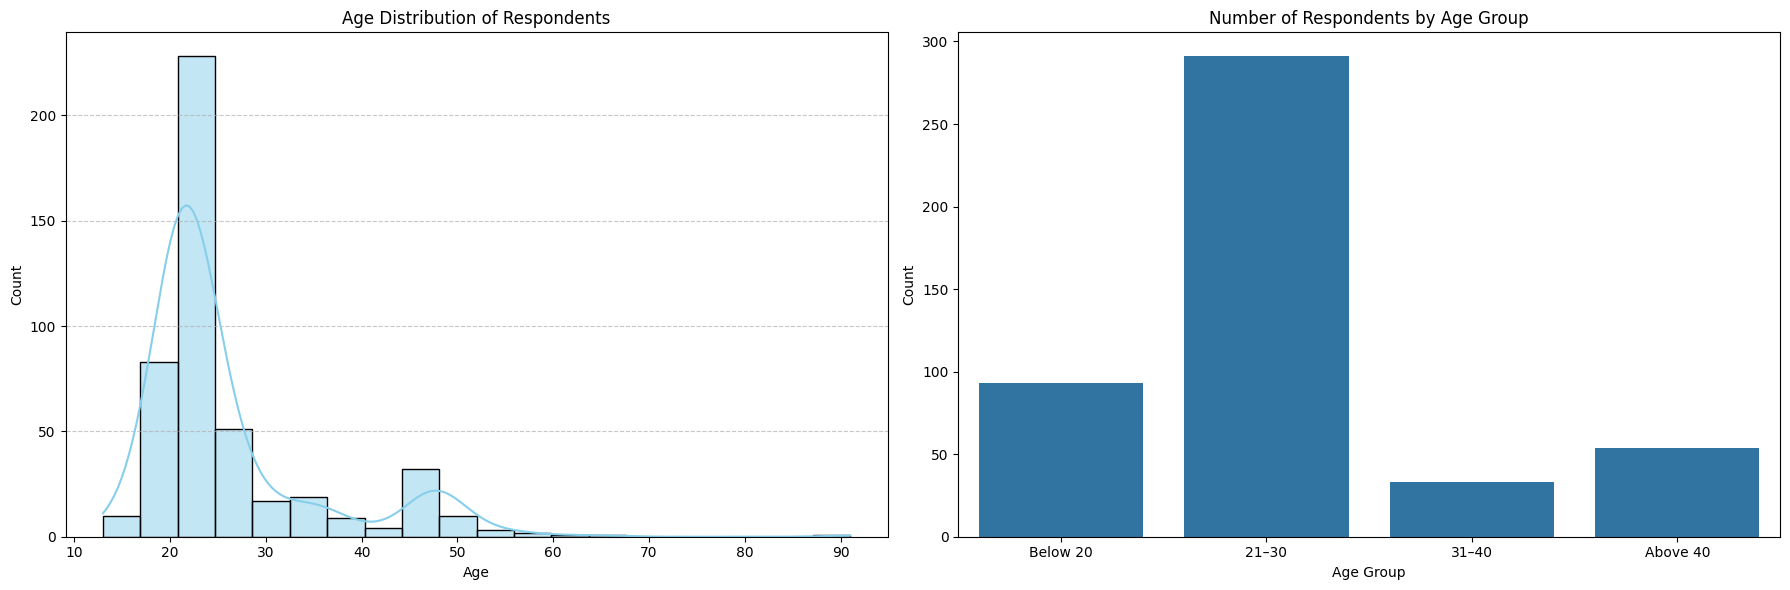

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # side by side, smaller height

# Define age group order
age_labels = ['Below 20', '21–30', '31–40', 'Above 40']

# Left: histogram of ages
sns.histplot(smmh_clean['age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution of Respondents')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right: count of respondents by age group
sns.countplot(data=smmh_clean, x='age_group', order=age_labels, ax=axes[1])
axes[1].set_title('Number of Respondents by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


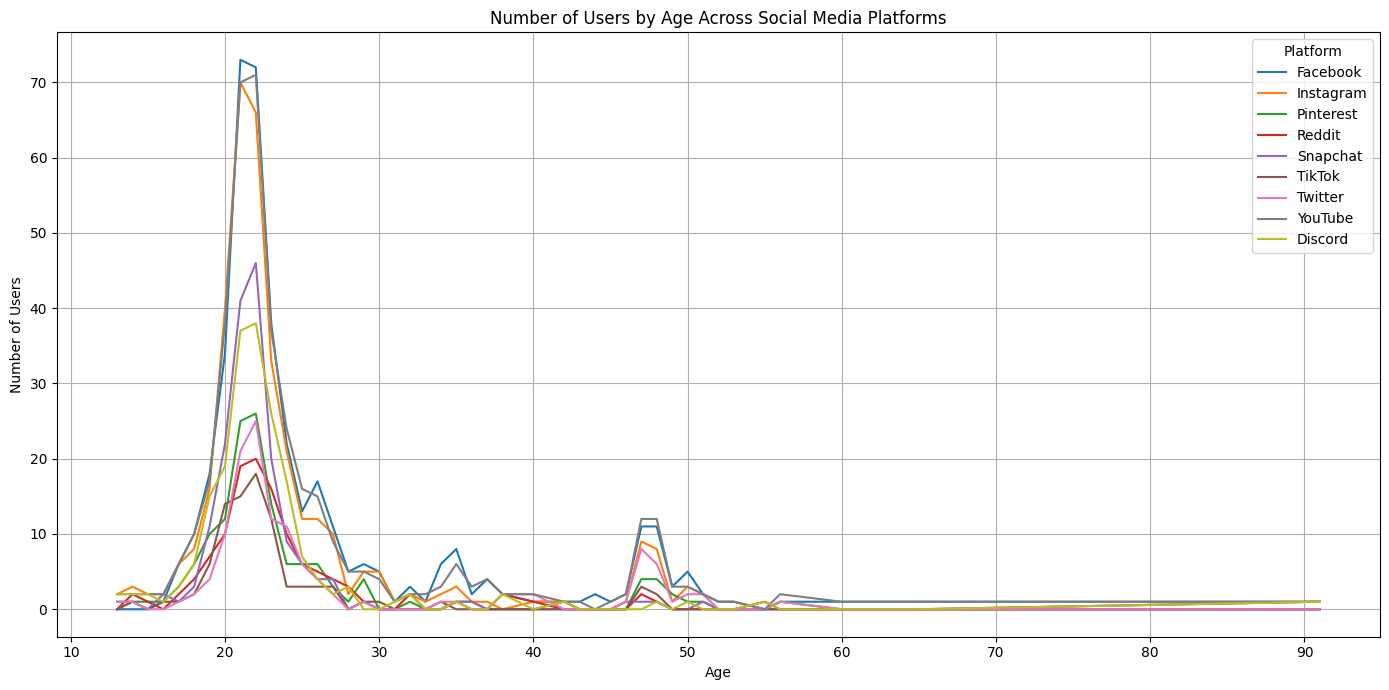

In [ ]:
import matplotlib.pyplot as plt

# Group data by age and sum the number of users per platform
age_platform_counts = smmh_clean.groupby('age')[platform_cols].sum()

# Plot
plt.figure(figsize=(14, 7))

for platform in platform_cols:
    plt.plot(age_platform_counts.index, age_platform_counts[platform], label=platform)

plt.title("Number of Users by Age Across Social Media Platforms")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.legend(title="Platform")
plt.grid(True)
plt.tight_layout()
plt.show()


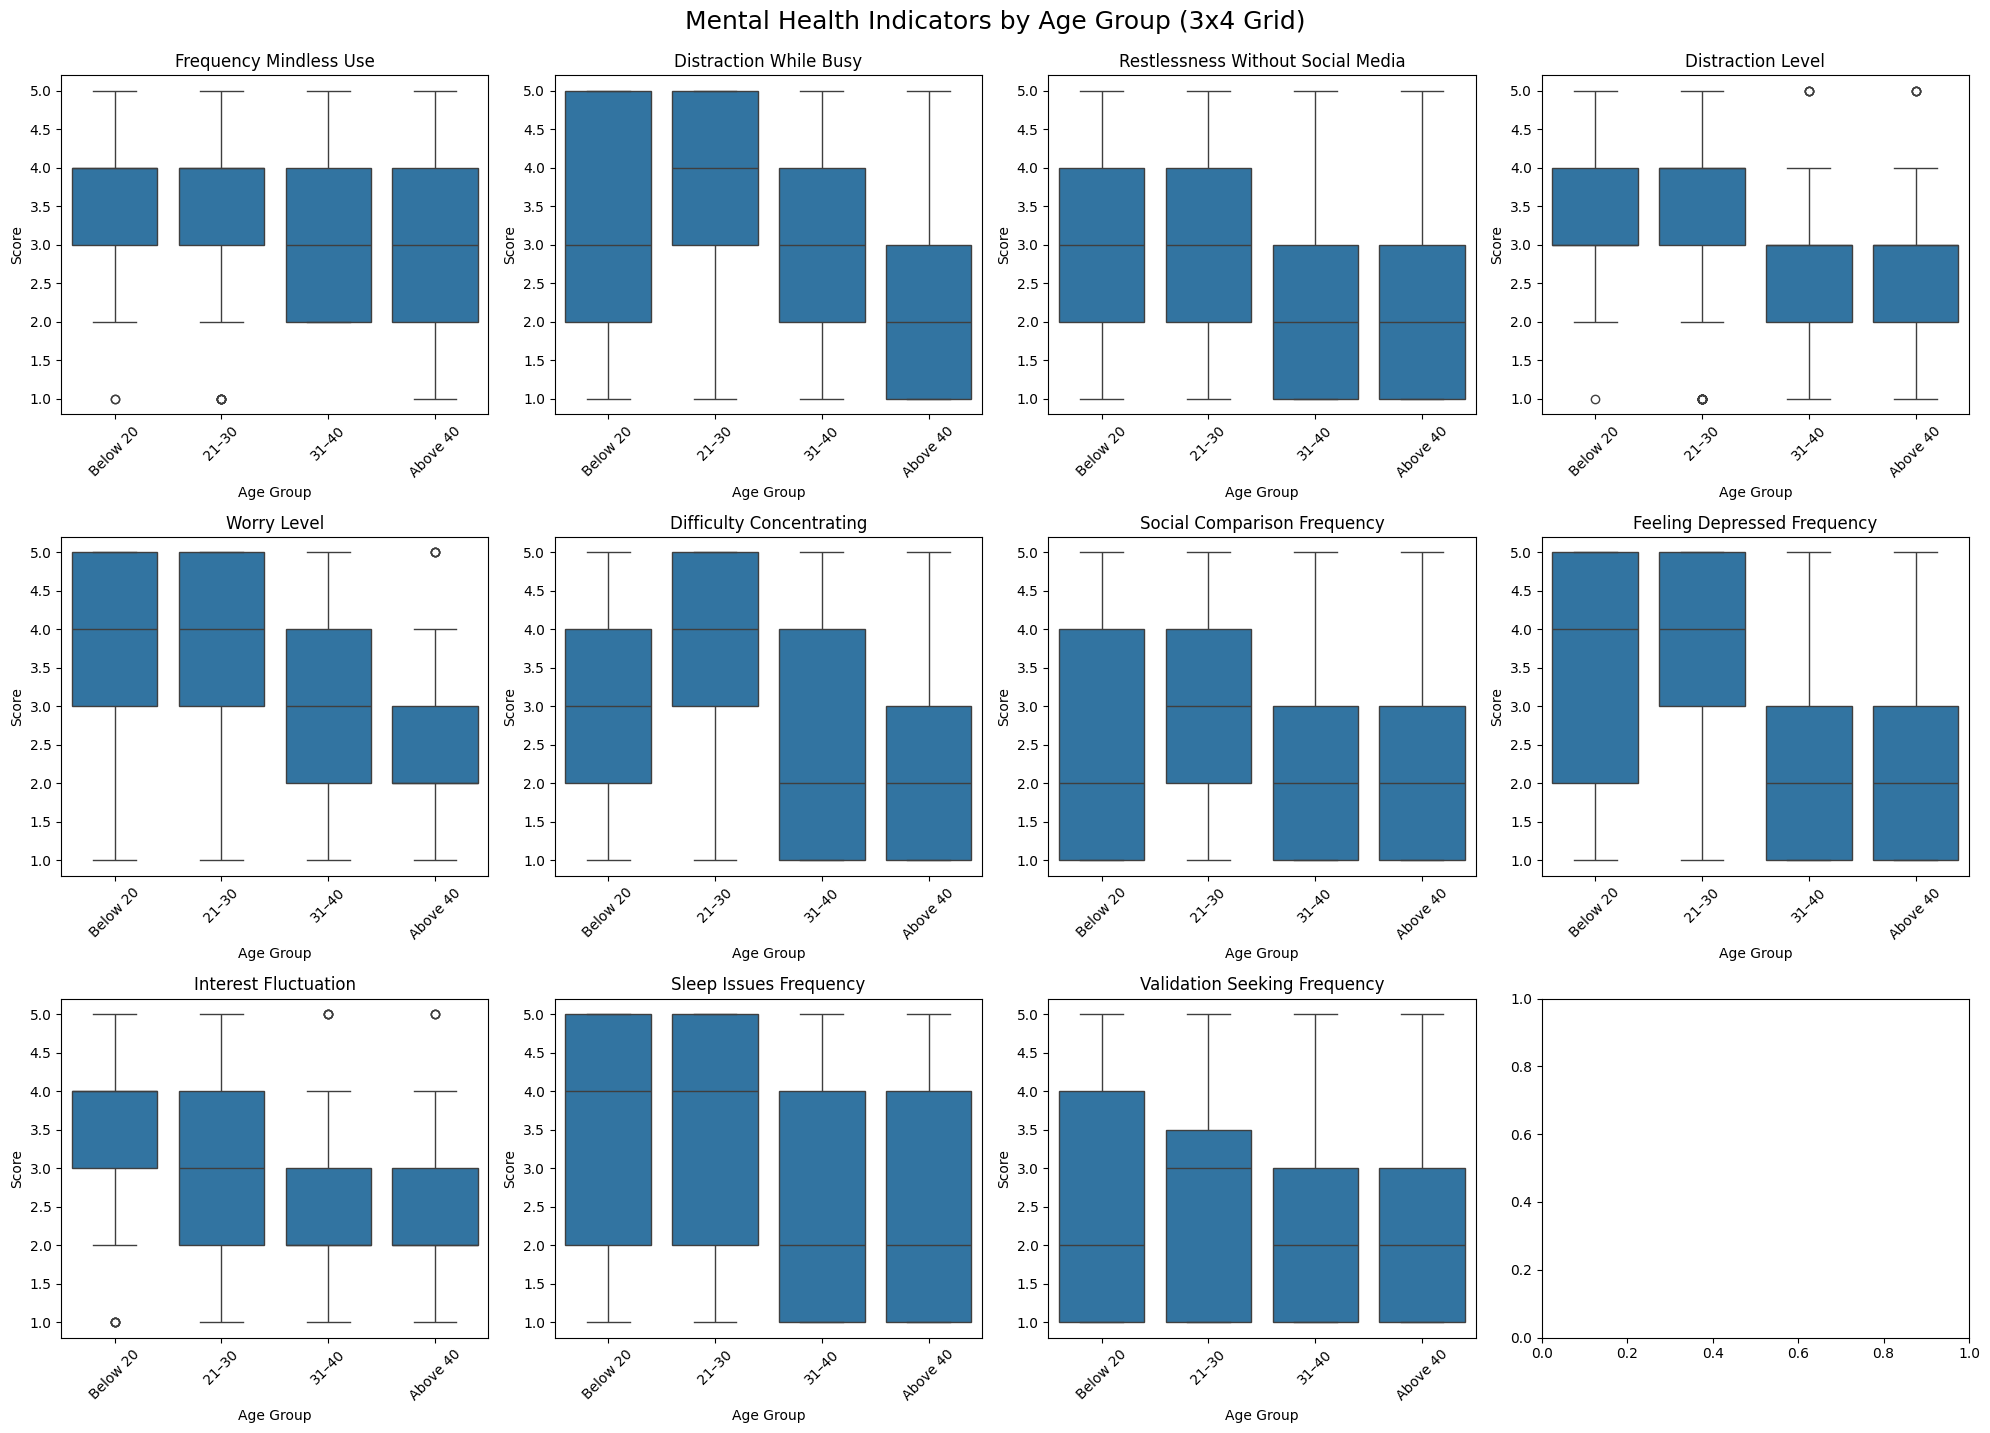

In [ ]:
# Mental Health Indicators by Age Group

# Plot in 3x4 grid chunks (leave unused plots empty)
for i in range(0, len(mh_columns), 12):
    fig, axs = plt.subplots(3, 4, figsize=(20, 14))
    axs = axs.flatten()

    for j, col in enumerate(mh_columns[i:i+12]):
        sns.boxplot(x='age_group', y=col, data=smmh_clean, ax=axs[j])
        axs[j].set_title(col.replace('_', ' ').title())
        axs[j].set_xlabel('Age Group')
        axs[j].set_ylabel('Score')
        axs[j].tick_params(axis='x', rotation=45)

    # leave unused subplots blank (no delaxes)

    plt.tight_layout()
    plt.suptitle('Mental Health Indicators by Age Group', fontsize=18, y=1.02)
    plt.show()


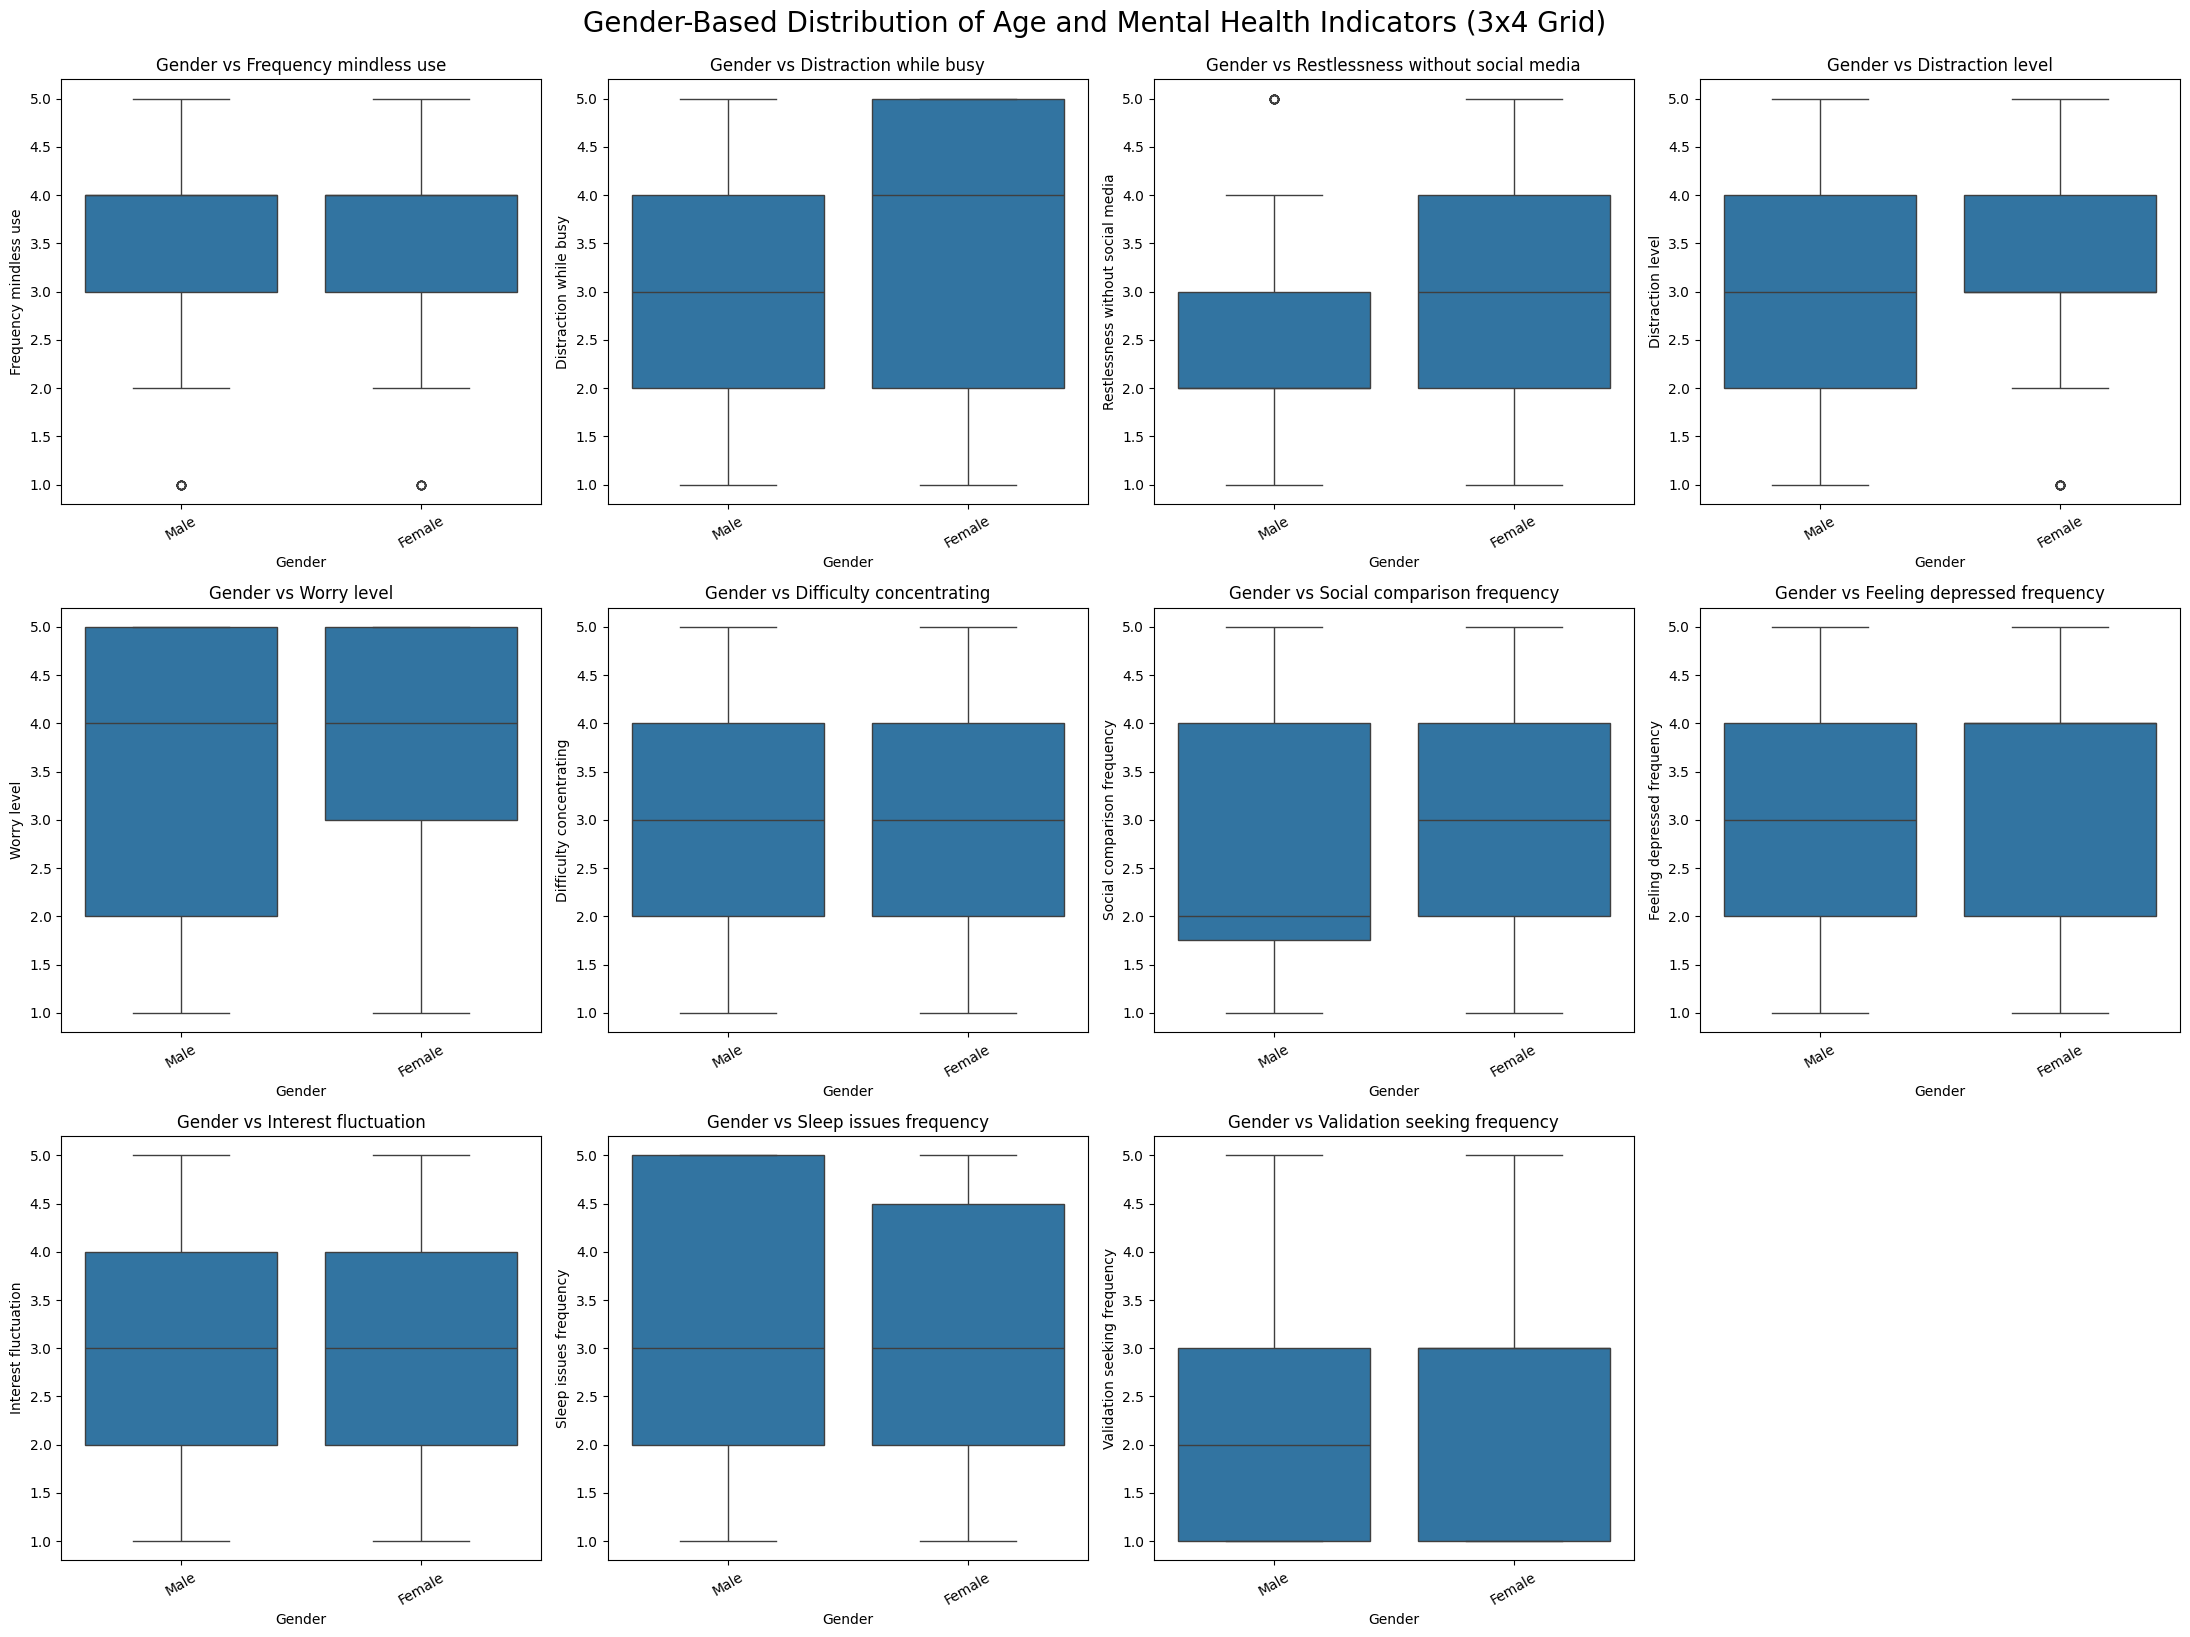

In [ ]:
# Plot in 3x4 grid chunks (gender vs. mental health indicators)
for i in range(0, len(mh_columns), 12):
    fig, axs = plt.subplots(3, 4, figsize=(22, 16))
    axs = axs.flatten()

    for j, col in enumerate(mh_columns[i:i+12]):
        sns.boxplot(data=smmh_clean, x='gender', y=col, ax=axs[j])
        axs[j].set_title(f'Gender vs {col.replace("_", " ").capitalize()}')
        axs[j].set_xlabel('Gender')
        axs[j].set_ylabel(col.replace("_", " ").capitalize())
        axs[j].tick_params(axis='x', rotation=30)

    # Leave unused subplots blank in the last grid
    for k in range(j + 1, 12):
        axs[k].axis("off")

    plt.tight_layout()
    plt.suptitle('Gender-Based Distribution of Age and Mental Health Indicators',
                 fontsize=20, y=1.02)
    plt.show()


#### Health Indicators by Average Social Media Time

In [ ]:
print(smmh_clean['avg_social_media_time'].unique())


['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
 'Between 1 and 2 hours' 'Less than an Hour' 'Between 4 and 5 hours']


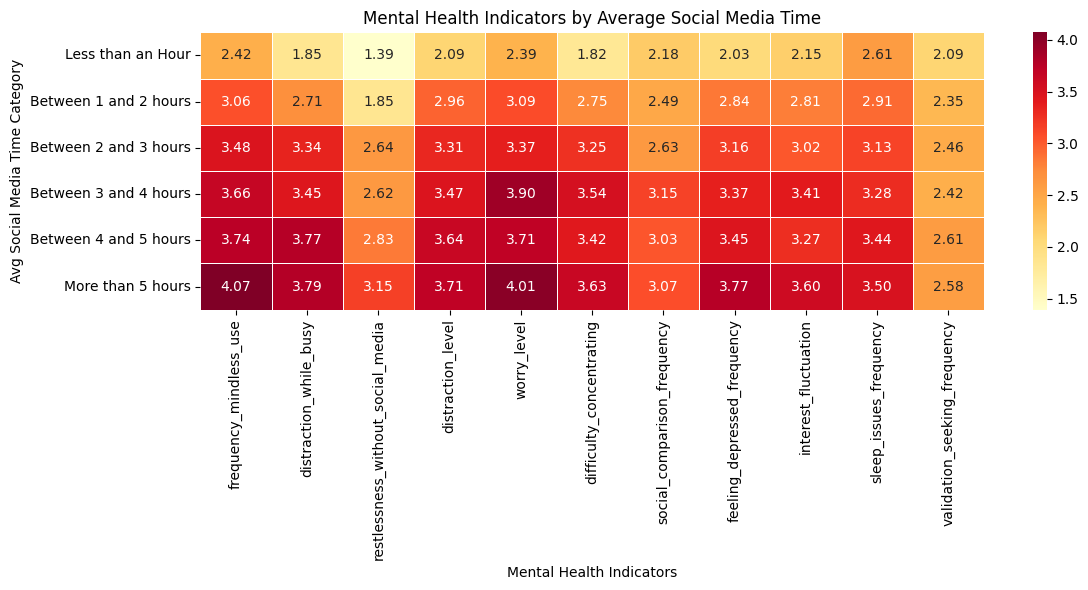

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by avg_social_media_time and compute mean for each mh column
heatmap_data = smmh_clean.groupby('avg_social_media_time')[mh_columns].mean()

# Sort the categories in logical order if needed
category_order = [
    'Less than an Hour',
    'Between 1 and 2 hours',
    'Between 2 and 3 hours',
    'Between 3 and 4 hours',
    'Between 4 and 5 hours',
    'More than 5 hours'
]
heatmap_data = heatmap_data.loc[category_order]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title("Mental Health Indicators by Average Social Media Time")
plt.xlabel("Mental Health Indicators")
plt.ylabel("Avg Social Media Time Category")
plt.tight_layout()
plt.show()


#### Risk Level

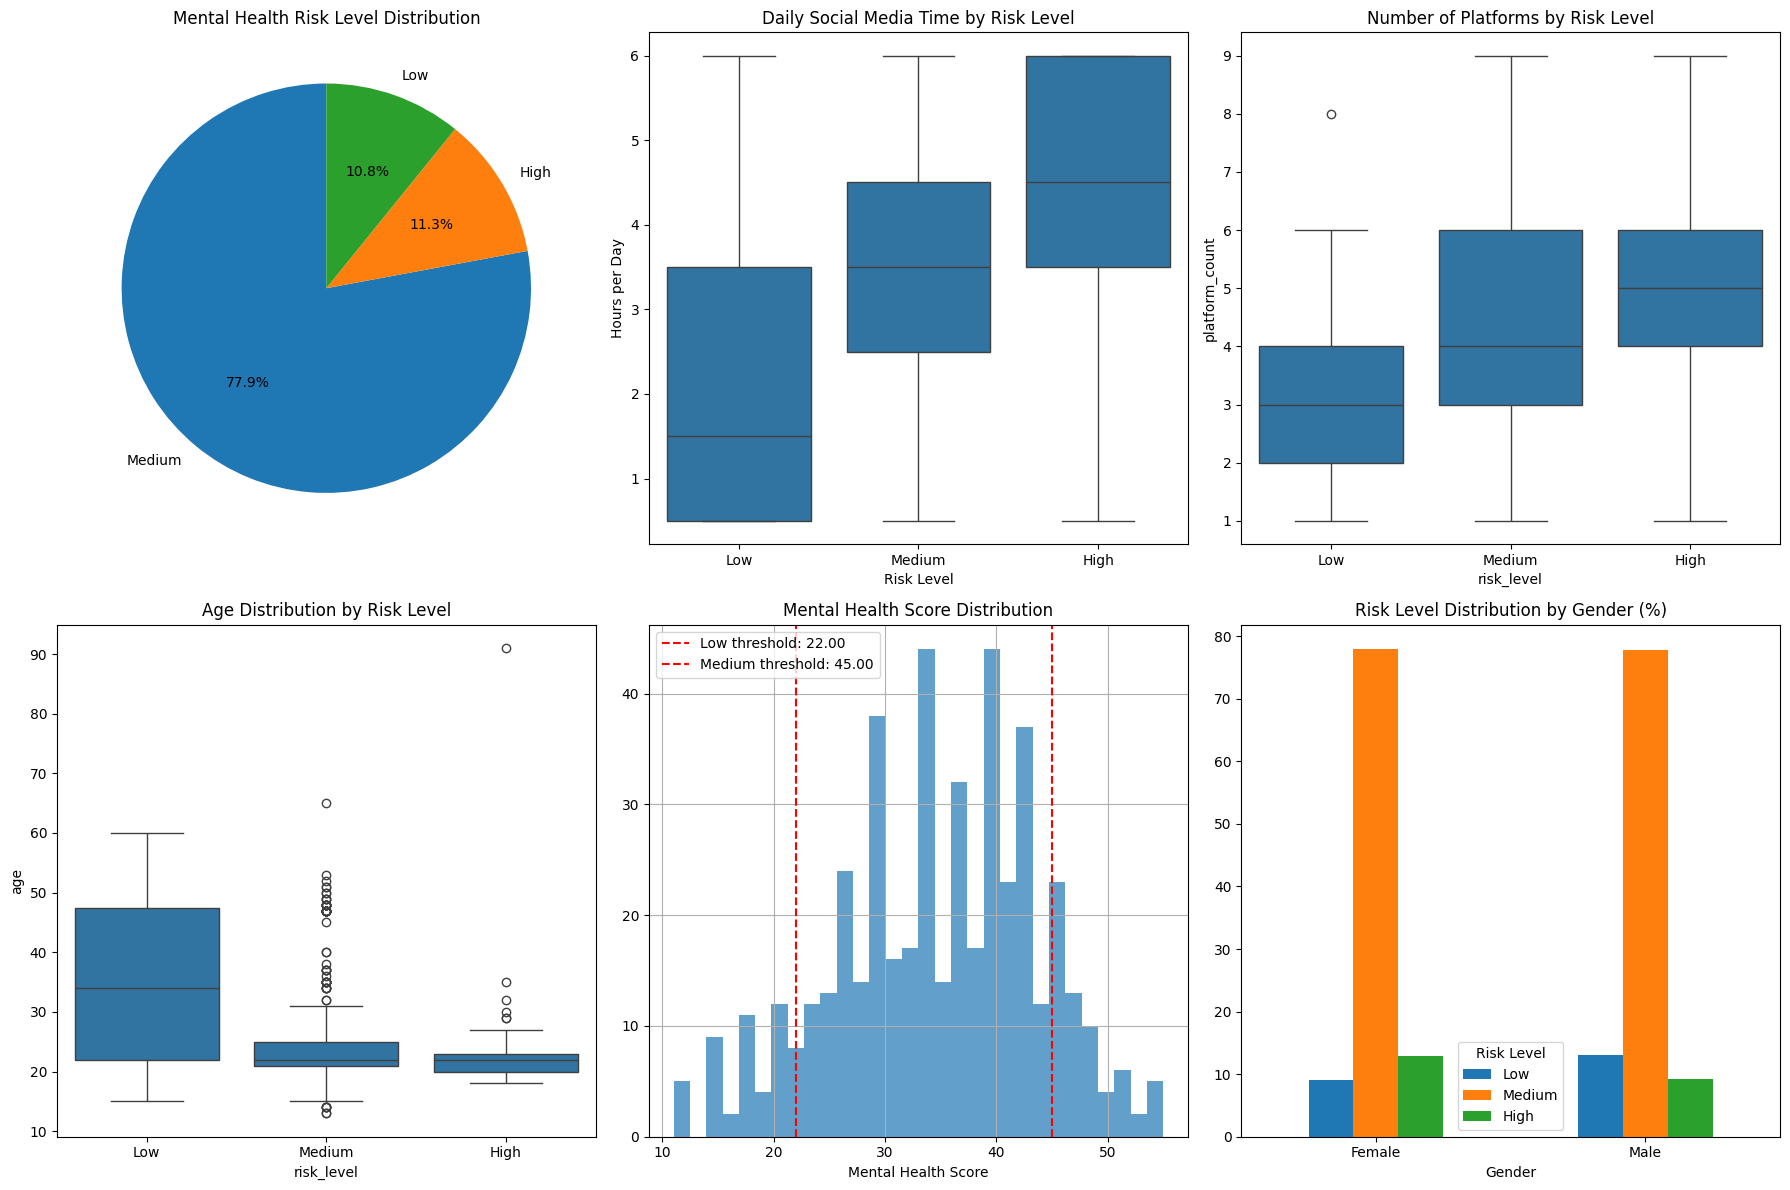

In [ ]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Risk level distribution
risk_counts = smmh_clean['risk_level'].value_counts()
axes[0,0].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Mental Health Risk Level Distribution')

# Plot 2: Time spent vs Risk Level
sns.boxplot(data=smmh_clean, x='risk_level', y='daily_hours_numeric', order=['Low', 'Medium', 'High'], ax=axes[0,1])
axes[0,1].set_title('Daily Social Media Time by Risk Level')
axes[0,1].set_xlabel('Risk Level')
axes[0,1].set_ylabel('Hours per Day')

# Plot 3: Platform count vs Risk Level
sns.boxplot(data=smmh_clean, x='risk_level', y='platform_count', order=['Low', 'Medium', 'High'], ax=axes[0,2])
axes[0,2].set_title('Number of Platforms by Risk Level')

# Plot 4: Age vs Risk Level
sns.boxplot(data=smmh_clean, x='risk_level', y='age', order=['Low', 'Medium', 'High'], ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Risk Level')

# Plot 5: Mental health score distribution
smmh_clean['mh_total_score'].hist(bins=30, alpha=0.7, ax=axes[1,1])
axes[1,1].axvline(low_threshold, color='red', linestyle='--', label=f'Low threshold: {low_threshold:.2f}')
axes[1,1].axvline(medium_threshold, color='red', linestyle='--', label=f'Medium threshold: {medium_threshold:.2f}')
axes[1,1].set_title('Mental Health Score Distribution')
axes[1,1].set_xlabel('Mental Health Score')
axes[1,1].legend()

# Plot 6: Gender vs Risk Level
risk_gender = pd.crosstab(smmh_clean['gender'], smmh_clean['risk_level'], normalize='index') * 100
risk_gender[['Low', 'Medium', 'High']].plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Risk Level Distribution by Gender (%)')
axes[1,2].set_xlabel('Gender')
axes[1,2].legend(title='Risk Level')
axes[1,2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

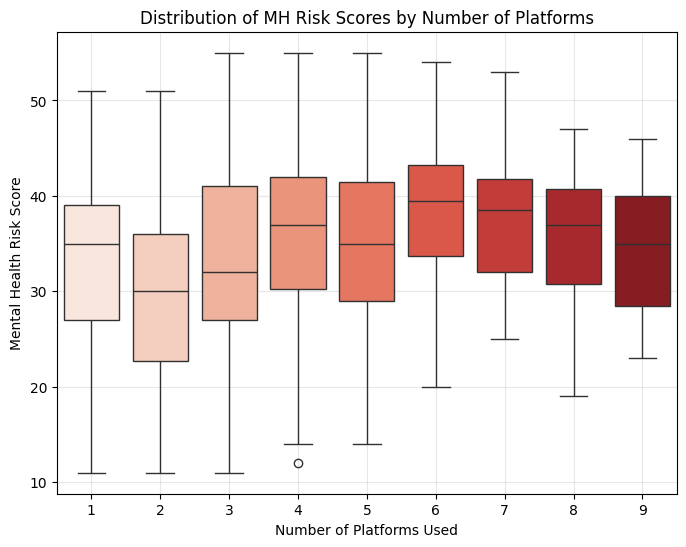

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot: Number of Platforms vs Mental Health Risk Score
plt.figure(figsize=(8,6))
ax = plt.gca()

sns.boxplot(
    data=smmh_clean,
    x='platform_count',
    y='mh_total_score',
    palette='Reds',
    ax=ax
)

# Labels and title
ax.set_xlabel('Number of Platforms Used')
ax.set_ylabel('Mental Health Risk Score')
ax.set_title('Distribution of MH Risk Scores by Number of Platforms')
ax.grid(True, alpha=0.3)

plt.show()


#### Platform Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Platform Combination

# List of individual platform columns
platform_cols = ['Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit',
                 'Snapchat', 'TikTok', 'Twitter', 'YouTube']

# Create a list to store all platform combinations and their data
platform_combos = []

# For each user, find their platform combination
for index, user in smmh_clean.iterrows():
    # Find which platforms this user uses
    user_platforms = []
    for platform in platform_cols:
        if user[platform] == 1 or user[platform] == True:  # Handle both boolean and numeric
            user_platforms.append(platform)

    # Only consider users who use at least 1 platform
    if len(user_platforms) > 0:
        # Sort platforms to ensure consistent combination naming
        user_platforms.sort()

        # Limit to first 3 platforms to avoid too many small combinations
        combo_platforms = user_platforms[:3]
        combo_name = ', '.join(combo_platforms)

        # Add this combination to our list
        platform_combos.append({
            'user_id': index,
            'combination': combo_name,
            'platform_count': len(combo_platforms),
            'risk_level': user['risk_level'],
            'mh_total_score': user['mh_total_score']
        })

# Convert to DataFrame for easier analysis
combo_df = pd.DataFrame(platform_combos)

print(f" Created {len(combo_df)} user-platform combination records")
print(f" Found {combo_df['combination'].nunique()} unique combinations")

 Created 471 user-platform combination records
 Found 54 unique combinations


In [ ]:
# Group by combination and calculate statistics
combo_stats = []

unique_combinations = combo_df['combination'].unique()
print(f"✓ Analyzing {len(unique_combinations)} different combinations...")

for combo_name in unique_combinations:
    combo_users = combo_df[combo_df['combination'] == combo_name]

    # Only analyze combinations with 10 or more users for statistical reliability
    if len(combo_users) >= 10:
        total_users = len(combo_users)

        # Count users in each risk category
        high_risk_count = len(combo_users[combo_users['risk_level'] == 'High'])
        medium_risk_count = len(combo_users[combo_users['risk_level'] == 'Medium'])
        low_risk_count = len(combo_users[combo_users['risk_level'] == 'Low'])

        # Calculate percentages
        high_risk_pct = (high_risk_count / total_users) * 100
        medium_risk_pct = (medium_risk_count / total_users) * 100
        low_risk_pct = (low_risk_count / total_users) * 100

        # Calculate average mental health score
        avg_mh_score = combo_users['mh_total_score'].mean()

        # Count number of platforms in this combination
        platform_count = combo_users['platform_count'].iloc[0]

        combo_stats.append({
            'combination': combo_name,
            'total_users': total_users,
            'high_risk_count': high_risk_count,
            'high_risk_pct': high_risk_pct,
            'medium_risk_pct': medium_risk_pct,
            'low_risk_pct': low_risk_pct,
            'avg_mh_total_score': avg_mh_score,
            'platform_count': platform_count
        })

# Convert to DataFrame and sort by high risk percentage
combo_results = pd.DataFrame(combo_stats)
combo_results = combo_results.sort_values('high_risk_pct', ascending=False)

print(f" Analyzed {len(combo_results)} combinations with 10+ users each")


✓ Analyzing 54 different combinations...
 Analyzed 9 combinations with 10+ users each


In [ ]:
# DISPLAY HIGHEST RISK COMBINATION

print("TOP 3 HIGHEST RISK PLATFORM COMBINATIONS")

top_3_combos = combo_results.head(3)

for idx, (i, row) in enumerate(top_3_combos.iterrows()):
    print(f"\n{idx+1}. {row['combination']}")
    print(f"   Total Users: {row['total_users']}")
    print(f"   High Risk: {row['high_risk_pct']:.1f}% ({row['high_risk_count']} users)")
    print(f"   Medium Risk: {row['medium_risk_pct']:.1f}%")
    print(f"   Low Risk: {row['low_risk_pct']:.1f}%")
    print(f"   Avg MH Total Score: {row['avg_mh_total_score']:.2f} \n")

# DISPLAY LOWEST RISK COMBINATIONS

print("TOP 3 LOWEST RISK PLATFORM COMBINATIONS")

bottom_3_combos = combo_results.tail(3).sort_values('high_risk_pct', ascending=True)

for idx, (i, row) in enumerate(bottom_3_combos.iterrows()):
    print(f"\n{idx+1}. {row['combination']}")
    print(f"   Total Users: {row['total_users']}")
    print(f"   High Risk: {row['high_risk_pct']:.1f}% ({row['high_risk_count']} users)")
    print(f"   Avg MH Total Score: {row['avg_mh_total_score']:.2f}")


TOP 3 HIGHEST RISK PLATFORM COMBINATIONS

1. Discord, Facebook, Instagram
   Total Users: 146
   High Risk: 16.4% (24 users)
   Medium Risk: 78.1%
   Low Risk: 5.5%
   Avg MH Total Score: 36.41 


2. Facebook, Instagram, Snapchat
   Total Users: 41
   High Risk: 14.6% (6 users)
   Medium Risk: 78.0%
   Low Risk: 7.3%
   Avg MH Total Score: 37.07 


3. Facebook, Instagram, Pinterest
   Total Users: 56
   High Risk: 14.3% (8 users)
   Medium Risk: 78.6%
   Low Risk: 7.1%
   Avg MH Total Score: 36.46 

TOP 3 LOWEST RISK PLATFORM COMBINATIONS

1. Facebook, Instagram, Twitter
   Total Users: 14
   High Risk: 0.0% (0 users)
   Avg MH Total Score: 33.79

2. Facebook, YouTube
   Total Users: 30
   High Risk: 0.0% (0 users)
   Avg MH Total Score: 29.17

3. Facebook, Instagram, Reddit
   Total Users: 10
   High Risk: 10.0% (1 users)
   Avg MH Total Score: 37.60


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# INDIVIDUAL PLATFORM RISK ANALYSIS

individual_platform_stats = []

for platform in platform_cols:  # platform_cols = list of your platform columns
    # Users of this platform
    platform_users = smmh_clean[smmh_clean[platform] == 1]
    # Users who don't use this platform
    non_users = smmh_clean[smmh_clean[platform] == 0]

    # Only analyze platforms with 10 or more users
    if len(platform_users) >= 10:
        total_users = len(platform_users)

        # Count high risk users
        high_risk_count = len(platform_users[platform_users['risk_level'] == 'High'])
        high_risk_pct = (high_risk_count / total_users) * 100

        # Average mental health scores
        avg_score_users = platform_users['mh_total_score'].mean()
        avg_score_non_users = non_users['mh_total_score'].mean()
        score_difference = avg_score_users - avg_score_non_users

        individual_platform_stats.append({
            'platform': platform,
            'total_users': total_users,
            'high_risk_count': high_risk_count,
            'high_risk_pct': round(high_risk_pct, 1),
            'avg_score_users': round(avg_score_users, 2),
            'avg_score_non_users': round(avg_score_non_users, 2),
            'score_difference': round(score_difference, 2)
        })

# Convert to DataFrame and sort by high risk %
platform_results = pd.DataFrame(individual_platform_stats)
platform_results = platform_results.sort_values('high_risk_pct', ascending=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# PLATFORM COUNT ANALYSIS

platform_count_analysis = []

for count in range(1, 8):  # Analyze 1 to 7 platforms
    count_users = smmh_clean[smmh_clean['platform_count'] == count]

    if len(count_users) >= 5:  # Need at least 5 users
        total_users = len(count_users)
        high_risk_count = len(count_users[count_users['risk_level'] == 'High'])
        high_risk_pct = (high_risk_count / total_users) * 100
        avg_mh_score = count_users['mh_total_score'].mean()

        platform_count_analysis.append({
            'platform_count': count,
            'total_users': total_users,
            'high_risk_count': high_risk_count,
            'high_risk_pct': round(high_risk_pct, 1),
            'avg_mh_score': round(avg_mh_score, 2)
        })

# Convert to DataFrame
count_df = pd.DataFrame(platform_count_analysis)
count_df = count_df.sort_values('platform_count')


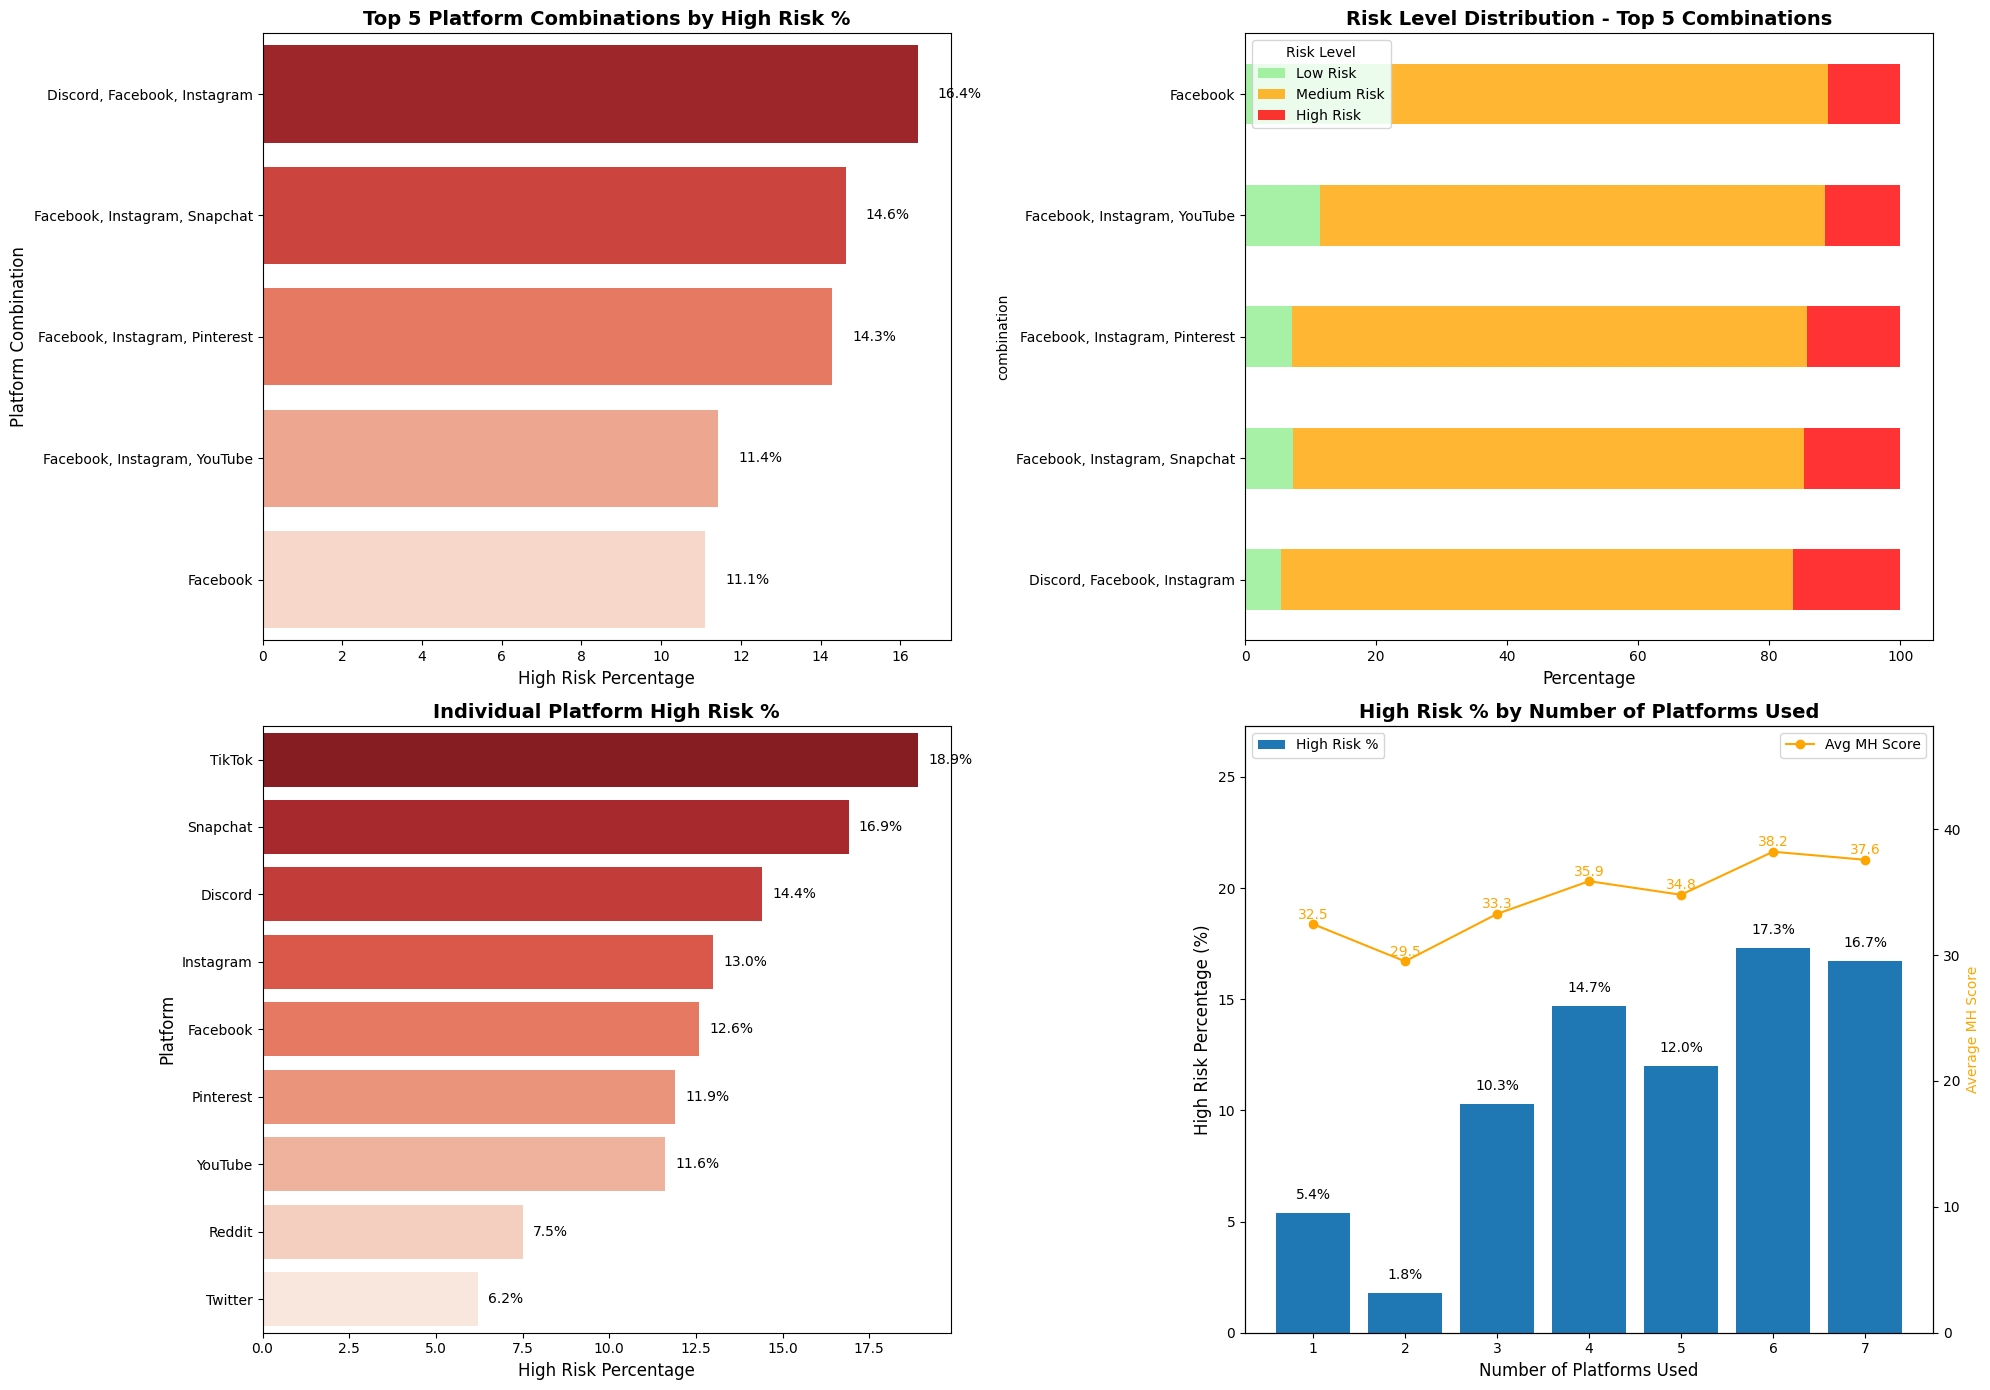

<Figure size 640x480 with 0 Axes>

In [ ]:
# CREATE VISUALIZATIONS

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Plot 1: Top 5 combinations by high risk percentage
top_5_plot = combo_results.head(5)
bars1 = sns.barplot(data=top_5_plot, y='combination', x='high_risk_pct', ax=axes[0,0], palette='Reds_r')
axes[0,0].set_title('Top 5 Platform Combinations by High Risk %', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('High Risk Percentage', fontsize=12)
axes[0,0].set_ylabel('Platform Combination', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(bars1.patches):
    width = bar.get_width()
    axes[0,0].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                   f'{width:.1f}%', ha='left', va='center', fontsize=10)

# Plot 2: Risk distribution for top 5 combinations (stacked bar)
risk_columns = ['low_risk_pct', 'medium_risk_pct', 'high_risk_pct']
top_5_risks = top_5_plot.set_index('combination')[risk_columns]

top_5_risks.plot(kind='barh', stacked=True, ax=axes[0,1],
                 color=['lightgreen', 'orange', 'red'], alpha=0.8)
axes[0,1].set_title('Risk Level Distribution - Top 5 Combinations', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Percentage', fontsize=12)
axes[0,1].legend(title='Risk Level', labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Plot 3: Individual platform risk comparison
platform_plot = platform_results.head(9)  # Top 9 platforms
bars3 = sns.barplot(data=platform_plot, y='platform', x='high_risk_pct', ax=axes[1,0], palette='Reds_r')
axes[1,0].set_title('Individual Platform High Risk %', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('High Risk Percentage', fontsize=12)
axes[1,0].set_ylabel('Platform', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(bars3.patches):
    width = bar.get_width()
    axes[1,0].text(width + 0.3, bar.get_y() + bar.get_height()/2,
                   f'{width:.1f}%', ha='left', va='center', fontsize=10)

# Plot 4: Risk by number of platforms

ax = axes[1, 1]  # bottom-right subplot

# Bar chart for High Risk %
bars = ax.bar(
    count_df['platform_count'],
    count_df['high_risk_pct'],
    label='High Risk %'
)

# Add labels on top of bars
for i, row in count_df.iterrows():
    ax.text(
        row['platform_count'],
        row['high_risk_pct'] + 0.5,
        f"{row['high_risk_pct']:.1f}%",
        ha='center', va='bottom'
    )

ax.set_xlabel("Number of Platforms Used", fontsize=12)
ax.set_ylabel("High Risk Percentage (%)", fontsize=12)
ax.set_title("High Risk % by Number of Platforms Used", fontsize=14, fontweight='bold')
ax.set_ylim(0, count_df['high_risk_pct'].max() + 10)

# Line plot for Avg MH Score on secondary y-axis
ax2 = ax.twinx()
ax2.plot(
    count_df['platform_count'],
    count_df['avg_mh_score'],
    color='orange',
    marker='o',
    label='Avg MH Score'
)

# Add labels for line points
for i, row in count_df.iterrows():
    ax2.text(
        row['platform_count'],
        row['avg_mh_score'] + 0.2,
        f"{row['avg_mh_score']:.1f}",
        ha='center', va='bottom', color='orange'
    )

ax2.set_ylabel("Average MH Score", color='orange')
ax2.set_ylim(0, max(count_df['avg_mh_score'].max(), count_df['high_risk_pct'].max()) + 10)

# Legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [ ]:
#  INSIGHTS SUMMARY
# Check if there's a trend with platform count
if len(count_df) >= 3:
    correlation = np.corrcoef(count_df['platform_count'], count_df['high_risk_pct'])[0,1]
    if correlation > 0.3:
        trend = "increases"
    elif correlation < -0.3:
        trend = "decreases"
    else:
        trend = "shows no clear pattern"

    print(f"   Trend: Mental health risk {trend} with more platforms (correlation: {correlation:.2f})")

print("TOP 10 HIGHEST RISK PLATFORM COMBINATIONS")

print(f"\n🔍 STATISTICAL SUMMARY:")
print(f"   • Total users analyzed: {len(smmh_clean)}")
print(f"   • Platform combinations with 10+ users: {len(combo_results)}")
print(f"   • Most popular combination: {combo_results.loc[combo_results['total_users'].idxmax(), 'combination']} "
      f"({combo_results['total_users'].max()} users)")


   Trend: Mental health risk increases with more platforms (correlation: 0.88)
TOP 10 HIGHEST RISK PLATFORM COMBINATIONS

🔍 STATISTICAL SUMMARY:
   • Total users analyzed: 471
   • Platform combinations with 10+ users: 9
   • Most popular combination: Discord, Facebook, Instagram (146 users)


## Model Development

In [ ]:
# Prepare features for modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Features for modelling

In [ ]:
# Digital usage patterns
digital_features = ['daily_hours_numeric', 'platform_count']

# Platform
platform_features = platform_cols

# Demographic features
demographic_features = ['age']

# Combine all features
all_features = digital_features + platform_features

In [ ]:
# Encode gender
le_gender = LabelEncoder()
smmh_clean['gender_encoded'] = le_gender.fit_transform(smmh_clean['gender'])
all_features.append('gender_encoded')

In [ ]:
# Encode relationship
le_relationship = LabelEncoder()
smmh_clean['rs_encoded'] = le_relationship.fit_transform(smmh_clean['relationship_status'])
all_features.append('rs_encoded')

In [ ]:
# Encode occupation
le_occupation = LabelEncoder()
smmh_clean['occ_encoded'] = le_occupation.fit_transform(smmh_clean['occupation_status'])
all_features.append('occ_encoded')

In [ ]:
all_features

['daily_hours_numeric',
 'platform_count',
 'Discord',
 'Facebook',
 'Instagram',
 'Pinterest',
 'Reddit',
 'Snapchat',
 'TikTok',
 'Twitter',
 'YouTube',
 'gender_encoded',
 'rs_encoded',
 'occ_encoded']

In [ ]:
print(f"Feature categories:")
print(f"Digital Usage: {digital_features}")
print(f"Platform: {platform_features}")
print(f"Demographics: {demographic_features + ['gender_encoded', 'rs_encoded', 'occ_encoded']}")
print(f"Total features: {len(all_features)}")


Feature categories:
Digital Usage: ['daily_hours_numeric', 'platform_count']
Platform: ['Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube']
Demographics: ['age', 'gender_encoded', 'rs_encoded', 'occ_encoded']
Total features: 14


In [ ]:
# Prepare data for modeling
X = smmh_clean[all_features].copy()
y = smmh_clean['risk_level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts(normalize=True).round(3).to_dict()}")


Training set: (376, 14)
Test set: (95, 14)
Training target distribution: {'Medium': 0.779, 'High': 0.112, 'Low': 0.109}


Counts of each risk level:
risk_level
Medium    367
High       53
Low        51
Name: count, dtype: int64

Percentage of each risk level:
risk_level
Medium    77.919321
High      11.252654
Low       10.828025
Name: proportion, dtype: float64


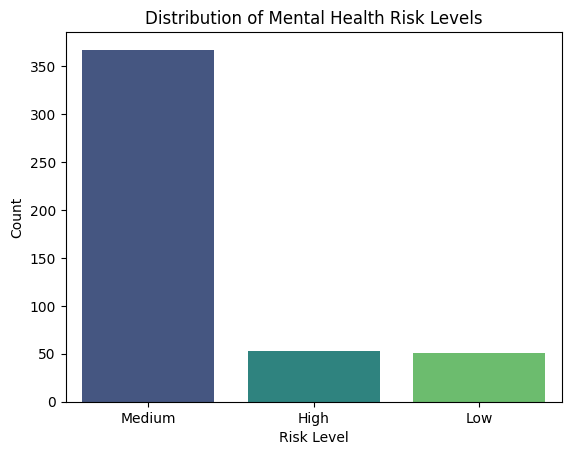

Imbalance ratio (max/min): 7.20


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each risk level
risk_counts = smmh_clean['risk_level'].value_counts()
print("Counts of each risk level:")
print(risk_counts)

# Percentages
risk_percent = smmh_clean['risk_level'].value_counts(normalize=True) * 100
print("\nPercentage of each risk level:")
print(risk_percent)

# Visualize distribution
sns.countplot(x='risk_level', data=smmh_clean, palette='viridis')
plt.title("Distribution of Mental Health Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

# Imbalance ratio
imbalance_ratio = risk_counts.max() / risk_counts.min()
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Resampled training set class distribution:", Counter(y_train_res))


Resampled training set class distribution: Counter({'Low': 293, 'Medium': 293, 'High': 293})


### Model Training

#### Decision Tree

In [ ]:
print(set(y_train_res))

{'High', 'Medium', 'Low'}


In [ ]:
# Initialize Decision Tree (basic hyperparameters)
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=8,
    min_samples_split=15,
    min_samples_leaf=5,
    class_weight={'Low': 1, 'Medium': 2, 'High': 5}  # 5x weight for HIGH-RISK class
)

# Fit model on data
dt_model.fit(X_train_res, y_train_res)

# Make predictions on the original test set
dt_pred = dt_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {rf_accuracy:.3f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.611

Decision Tree Classification Report:
              precision    recall  f1-score   support

        High       0.15      0.36      0.21        11
         Low       0.67      0.60      0.63        10
      Medium       0.81      0.65      0.72        74

    accuracy                           0.61        95
   macro avg       0.54      0.54      0.52        95
weighted avg       0.72      0.61      0.65        95



In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Custom scorer for High-risk class
f1_high_scorer = make_scorer(f1_score, pos_label='High', average='macro')

param_grid_dt = {
    'max_depth': [6, 8],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'class_weight': [{'Low':1,'Medium':2,'High':5}],
    'criterion': ['gini']
}

# Stratified K-Fold to maintain class distribution in folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with multiple scoring metrics
dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=skf,
    scoring={
        'accuracy': 'accuracy',
        'balanced_accuracy': 'balanced_accuracy',
        'f1_weighted': 'f1_weighted',
        'f1_high': f1_high_scorer
    },
    refit='f1_high',
    n_jobs=-1,
    verbose=1
)

print("Performing hyperparameter tuning for Decision Tree")

# Fit the grid search on SMOTE training data
dt_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f"Best Decision Tree parameters: {dt_grid_search.best_params_}")
print(f"Best weighted F1 score (CV): {dt_grid_search.best_score_:.3f}")

Performing hyperparameter tuning for Decision Tree with SMOTE
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Decision Tree parameters: {'class_weight': {'Low': 1, 'Medium': 2, 'High': 5}, 'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best weighted F1 score (CV): 0.703


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Untuned and tuned models
dt_model_untuned = dt_model  # original Decision Tree (Baseline)
dt_model_tuned = dt_grid_search.best_estimator_

# Predictions on the test set
dt_pred_untuned = dt_model_untuned.predict(X_test)
dt_pred_tuned = dt_model_tuned.predict(X_test)

# Test set metrics
metrics = {
    "Accuracy": accuracy_score,
    "Balanced Accuracy": balanced_accuracy_score,
    "F1 Weighted": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

print("=== Test Set Comparison ===")
for name, func in metrics.items():
    dt_untuned_score = func(y_test, dt_pred_untuned)
    dt_tuned_score = func(y_test, dt_pred_tuned)
    print(f"{name}: Untuned = {dt_untuned_score:.3f} | Tuned = {dt_tuned_score:.3f}")

# Cross-validation metrics (5-fold)
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted']

print("\n=== Cross-Validation Comparison (5-fold) ===")
for score in scoring:
    dt_cv_untuned = cross_val_score(dt_model_untuned, X_train_res, y_train_res, cv=5, scoring=score)
    dt_cv_tuned = cross_val_score(dt_model_tuned, X_train_res, y_train_res, cv=5, scoring=score)
    print(f"{score}: Untuned = {dt_cv_untuned.mean():.3f} ± {dt_cv_untuned.std():.3f} | "
          f"Tuned  = {dt_cv_tuned.mean():.3f} ± {dt_cv_tuned.std():.3f}")

# Detailed classification reports
print("\n=== Classification Report: Base Decision Tree ===")
print(classification_report(y_test, dt_pred_untuned))

print("=== Classification Report: Tuned Decision Tree ===")
print(classification_report(y_test, dt_pred_tuned))


=== Test Set Comparison ===
Accuracy: Untuned = 0.611 | Tuned = 0.621
Balanced Accuracy: Untuned = 0.537 | Tuned = 0.516
F1 Weighted: Untuned = 0.653 | Tuned = 0.659

=== Cross-Validation Comparison (5-fold) ===
accuracy: Untuned = 0.718 ± 0.071 | Tuned  = 0.723 ± 0.067
balanced_accuracy: Untuned = 0.718 ± 0.071 | Tuned  = 0.722 ± 0.067
f1_weighted: Untuned = 0.715 ± 0.072 | Tuned  = 0.719 ± 0.069

=== Classification Report: Untuned Decision Tree ===
              precision    recall  f1-score   support

        High       0.15      0.36      0.21        11
         Low       0.67      0.60      0.63        10
      Medium       0.81      0.65      0.72        74

    accuracy                           0.61        95
   macro avg       0.54      0.54      0.52        95
weighted avg       0.72      0.61      0.65        95

=== Classification Report: Tuned Decision Tree ===
              precision    recall  f1-score   support

        High       0.12      0.27      0.17        11
    

In [ ]:
# Feature importance for Decision Tree
dt_importance = pd.DataFrame({
    'feature': all_features,
    'importance': dt_model_tuned.feature_importances_
}).sort_values('importance', ascending=False)

print("\nDecision Tree - Top 10 Most Important Features:")
print(dt_importance.head(10))


Decision Tree - Top 10 Most Important Features:
                feature  importance
0   daily_hours_numeric    0.464248
1        platform_count    0.087275
2               Discord    0.069889
12           rs_encoded    0.062256
3              Facebook    0.055603
5             Pinterest    0.050790
13          occ_encoded    0.050094
11       gender_encoded    0.040438
4             Instagram    0.034387
10              YouTube    0.032498


#### Random Forest

In [ ]:
# Basic Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight={'Low': 1, 'Medium': 1, 'High': 5},  # Emphasize High-risk
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

# Fit model on data
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the original test set
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.747

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.17      0.09      0.12        11
         Low       0.50      0.50      0.50        10
      Medium       0.82      0.88      0.85        74

    accuracy                           0.75        95
   macro avg       0.50      0.49      0.49        95
weighted avg       0.71      0.75      0.73        95



In [ ]:
# Random Forest with hyperparameter tuning

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'class_weight': [{'Low':1, 'Medium':1, 'High':5}]  # emphasize High-risk
}

# Stratified K-Fold for imbalanced classes
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=skf,
    scoring={
        'accuracy': 'accuracy',
        'balanced_accuracy': 'balanced_accuracy',
        'f1_weighted': 'f1_weighted',
        'f1_high': f1_high_scorer
    },
    refit='f1_high',
    n_jobs=-1,
    verbose=1
)

print("Performing hyperparameter tuning for Random Forest")
rf_grid_search.fit(X_train_res, y_train_res)

print(f"Best Random Forest parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_:.3f}")

Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest parameters: {'class_weight': {'Low': 1, 'Medium': 1, 'High': 5}, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.674


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

rf_model_untuned = rf_model  # your original model
rf_model_tuned = rf_grid_search.best_estimator_

# Predictions
rf_pred_untuned = rf_model_untuned.predict(X_test)
rf_pred_tuned = rf_model_tuned.predict(X_test)

# Test set metrics
metrics = {
    "Accuracy": accuracy_score,
    "Balanced Accuracy": balanced_accuracy_score,
    "F1 Weighted": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

print("=== Test Set Comparison ===")
for name, func in metrics.items():
    rf_untuned_score = func(y_test, rf_pred_untuned)
    rf_tuned_score = func(y_test, rf_pred_tuned)
    print(f"{name}: Untuned = {rf_untuned_score:.3f} | Tuned = {rf_tuned_score:.3f}")

# Cross-validation metrics (5-fold)
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted']

print("\n=== Cross-Validation Comparison (5-fold) ===")
for score in scoring:
    rf_cv_untuned = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring=score)
    rf_cv_tuned = cross_val_score(rf_grid_search.best_estimator_, X_train_res, y_train_res, cv=5, scoring=score)
    print(f"{score}: Untuned = {rf_cv_untuned.mean():.3f} ± {rf_cv_untuned.std():.3f} | Tuned = {rf_cv_tuned.mean():.3f} ± {rf_cv_tuned.std():.3f}")

# Detailed classification reports
print("\n=== Classification Report: Base Random Forest ===")
print(classification_report(y_test, rf_pred_untuned))

print("=== Classification Report: Tuned Random Forest ===")
print(classification_report(y_test, rf_pred_tuned))


=== Test Set Comparison ===
Accuracy: Untuned = 0.747 | Tuned = 0.505
Balanced Accuracy: Untuned = 0.490 | Tuned = 0.679
F1 Weighted: Untuned = 0.728 | Tuned = 0.546

=== Cross-Validation Comparison (5-fold) ===
accuracy: Untuned = 0.859 ± 0.086 | Tuned = 0.694 ± 0.031
balanced_accuracy: Untuned = 0.859 ± 0.086 | Tuned = 0.694 ± 0.031
f1_weighted: Untuned = 0.860 ± 0.083 | Tuned = 0.679 ± 0.031

=== Classification Report: Untuned Random Forest ===
              precision    recall  f1-score   support

        High       0.17      0.09      0.12        11
         Low       0.50      0.50      0.50        10
      Medium       0.82      0.88      0.85        74

    accuracy                           0.75        95
   macro avg       0.50      0.49      0.49        95
weighted avg       0.71      0.75      0.73        95

=== Classification Report: Tuned Random Forest ===
              precision    recall  f1-score   support

        High       0.20      0.82      0.33        11
       

In [ ]:
# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    'feature': all_features,
    'importance': rf_model_tuned.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest - Top 10 Most Important Features:")
print(rf_importance.head(10))


Random Forest - Top 10 Most Important Features:
                feature  importance
0   daily_hours_numeric    0.340579
1        platform_count    0.171159
13          occ_encoded    0.087027
12           rs_encoded    0.072224
11       gender_encoded    0.053445
8                TikTok    0.039769
9               Twitter    0.039688
2               Discord    0.035749
4             Instagram    0.031847
5             Pinterest    0.029155


#### Support Vector Machine

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Build pipeline: scaling + SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scales after SMOTE
    ('svm', SVC(
        random_state=42,
        probability=True,
        class_weight={'Low': 1, 'Medium': 1, 'High': 5},  # Emphasize High-risk
    ))
])

# Fit the pipeline on training data
svm_pipeline.fit(X_train_res, y_train_res)

# Predict on test data
svm_pred = svm_pipeline.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy with SMOTE: {svm_accuracy:.3f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))


SVM Accuracy with SMOTE: 0.600

SVM Classification Report with SMOTE:
              precision    recall  f1-score   support

        High       0.13      0.27      0.18        11
         Low       0.50      0.60      0.55        10
      Medium       0.80      0.65      0.72        74

    accuracy                           0.60        95
   macro avg       0.48      0.51      0.48        95
weighted avg       0.69      0.60      0.64        95



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Hyperparameter grid for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto'],   # only used for rbf/poly
    'svm__class_weight': [{'Low': 1, 'Medium': 1, 'High': 5}]
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with multiple scoring metrics
svm_grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid_svm,
    cv=skf,
    scoring={
        'accuracy': 'accuracy',
        'balanced_accuracy': 'balanced_accuracy',
        'f1_weighted': 'f1_weighted',
        'f1_high': f1_high_scorer
    },
    refit='f1_high',
    n_jobs=-1,
    verbose=1
)

print("Performing hyperparameter tuning for SVM")

# Fit GridSearchCV
svm_grid_search.fit(X_train_res, y_train_res)

# Best parameters found
print(f"Best SVM parameters: {svm_grid_search.best_params_}")
print(f"Best weighted F1 score (CV): {svm_grid_search.best_score_:.3f}")


Performing hyperparameter tuning for SVM with SMOTE
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVM parameters: {'svm__C': 10, 'svm__class_weight': {'Low': 1, 'Medium': 1, 'High': 5}, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best weighted F1 score (CV): 0.807


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

# Define untuned and tuned SVM models
svm_model_untuned = svm_pipeline
svm_model_tuned = svm_grid_search.best_estimator_

# Predictions
svm_pred_untuned = svm_model_untuned.predict(X_test)
svm_pred_tuned = svm_model_tuned.predict(X_test)

# Test set metrics
metrics = {
    "Accuracy": accuracy_score,
    "Balanced Accuracy": balanced_accuracy_score,
    "F1 Weighted": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

print("=== Test Set Comparison (SVM) ===")
for name, func in metrics.items():
    svm_untuned_score = func(y_test, svm_pred_untuned)
    svm_tuned_score = func(y_test, svm_pred_tuned)
    print(f"{name}: Untuned = {svm_untuned_score:.3f} | Tuned = {svm_tuned_score:.3f}")

# Cross-validation metrics (5-fold)
scoring = ['accuracy', 'balanced_accuracy', 'f1_weighted']

print("\n=== Cross-Validation Comparison (5-fold, SVM) ===")
for score in scoring:
    # Untuned CV (use original scaled train data)
    svm_cv_untuned = cross_val_score(svm_model_untuned,  X_train_res, y_train_res, cv=5, scoring=score)

    # Tuned CV (use SMOTE data)
    svm_cv_tuned = cross_val_score(svm_model_tuned, X_train_res, y_train_res, cv=5, scoring=score)

    print(f"{score}: Untuned = {svm_cv_untuned.mean():.3f} ± {svm_cv_untuned.std():.3f} | "
          f"Tuned = {svm_cv_tuned.mean():.3f} ± {svm_cv_tuned.std():.3f}")

# Detailed classification reports
print("\n=== Classification Report: Untuned SVM ===")
print(classification_report(y_test, svm_pred_untuned))

print("=== Classification Report: Tuned SVM ===")
print(classification_report(y_test, svm_pred_tuned))


=== Test Set Comparison (SVM) ===
Accuracy: Untuned = 0.600 | Tuned = 0.726
Balanced Accuracy: Untuned = 0.507 | Tuned = 0.532
F1 Weighted: Untuned = 0.636 | Tuned = 0.729

=== Cross-Validation Comparison (5-fold, SVM) ===
accuracy: Untuned = 0.751 ± 0.045 | Tuned = 0.800 ± 0.105
balanced_accuracy: Untuned = 0.751 ± 0.045 | Tuned = 0.800 ± 0.106
f1_weighted: Untuned = 0.748 ± 0.044 | Tuned = 0.799 ± 0.104

=== Classification Report: Untuned SVM ===
              precision    recall  f1-score   support

        High       0.13      0.27      0.18        11
         Low       0.50      0.60      0.55        10
      Medium       0.80      0.65      0.72        74

    accuracy                           0.60        95
   macro avg       0.48      0.51      0.48        95
weighted avg       0.69      0.60      0.64        95

=== Classification Report: Tuned SVM ===
              precision    recall  f1-score   support

        High       0.25      0.27      0.26        11
         Low    

### Model Comparision and Analysis

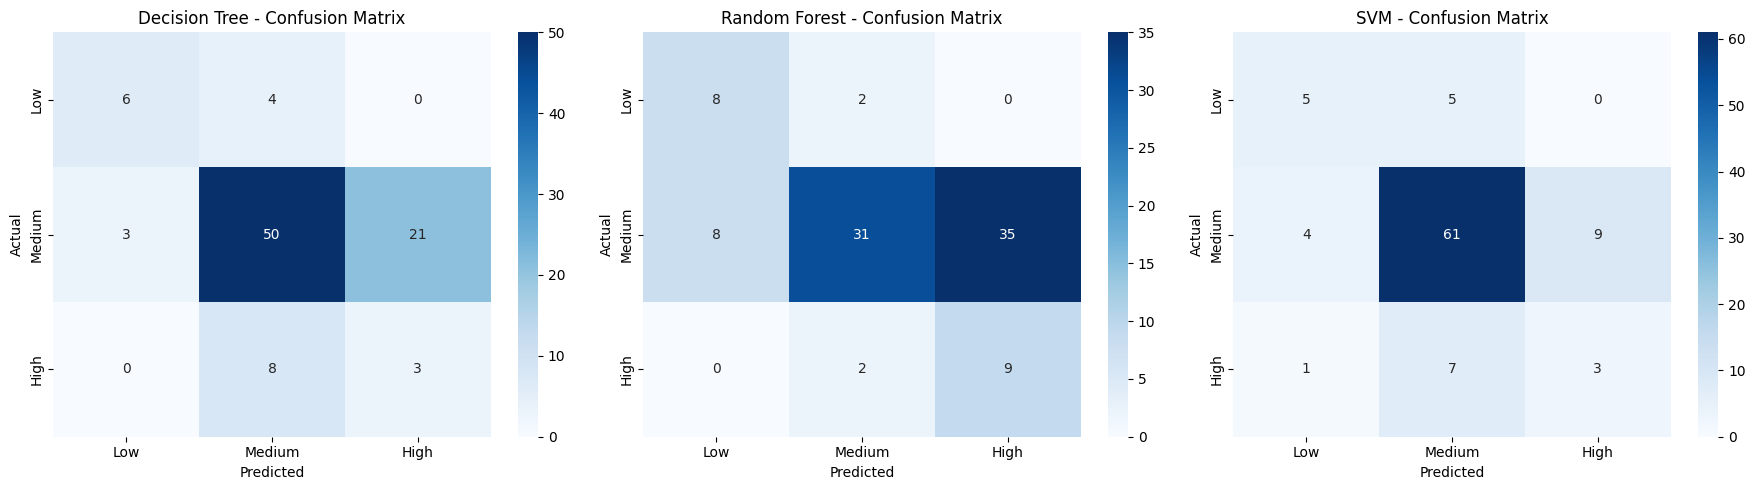

In [ ]:
# Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Labels
labels = ['Low', 'Medium', 'High']

# Decision Tree confusion matrix
cm_dt = confusion_matrix(y_test, dt_pred_tuned, labels=labels)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Decision Tree - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred_tuned, labels=labels)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Random Forest - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# SVM confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred_tuned, labels=labels)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title('SVM - Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


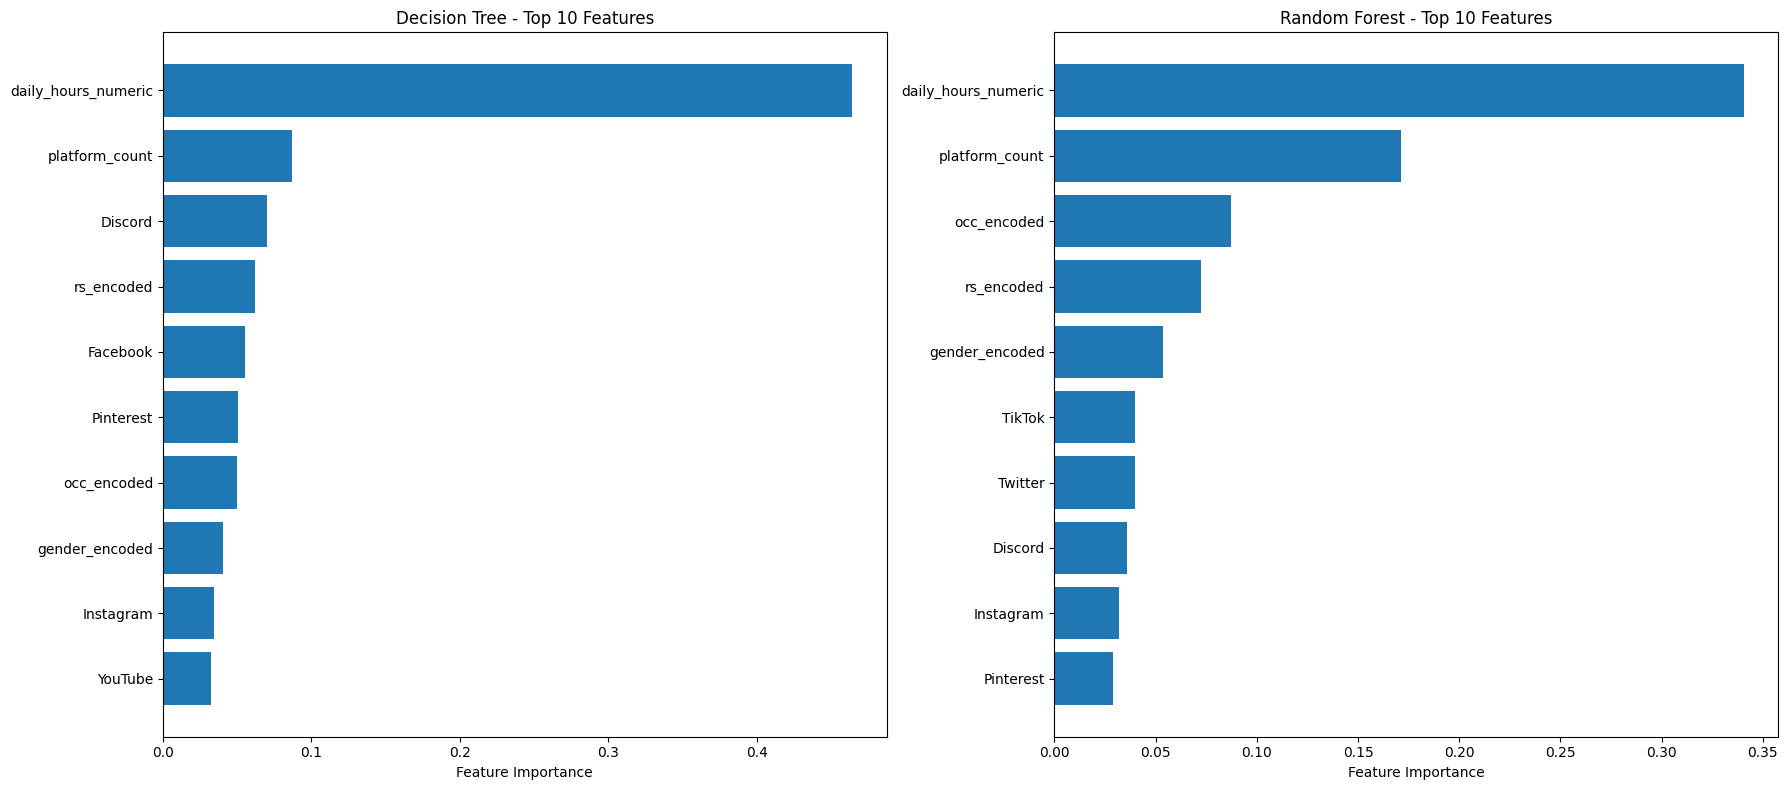

In [ ]:
# Feature importance comparison
fig, axes = plt.subplots(1,2, figsize=(18, 8))

# Decision Tree feature importance
top_dt_features = dt_importance.head(10)
axes[0].barh(range(len(top_dt_features)), top_dt_features['importance'])
axes[0].set_yticks(range(len(top_dt_features)))
axes[0].set_yticklabels(top_dt_features['feature'])
axes[0].set_xlabel('Feature Importance')
axes[0].set_title('Decision Tree - Top 10 Features')
axes[0].invert_yaxis()

# Random Forest feature importance
top_rf_features = rf_importance.head(10)
axes[1].barh(range(len(top_rf_features)), top_rf_features['importance'])
axes[1].set_yticks(range(len(top_rf_features)))
axes[1].set_yticklabels(top_rf_features['feature'])
axes[1].set_xlabel('Feature Importance')
axes[1].set_title('Random Forest - Top 10 Features')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    classification_report
)

# MODEL PERFORMANCE COMPARISON FOR MENTAL HEALTH PREDICTION

# Define my models
models = {
    'Decision Tree': dt_grid_search.best_estimator_,
    'Random Forest': rf_grid_search.best_estimator_,
    'Support Vector Machine': svm_grid_search.best_estimator_
}

# Create empty lists to store results
model_names = []
precision_scores = []
recall_scores = []
f1_scores = []
high_risk_precision = []
high_risk_recall = []
high_risk_f1 = []
roc_auc_scores = []


for model_name, model in models.items():

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate overall performance metrics (macro average)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calculate HIGH-RISK specific metrics (most important for mental health)
    # Focus only on 'High' risk class
    high_precision = precision_score(y_test, y_pred, pos_label='High', average='macro', labels=['High'])
    high_recall = recall_score(y_test, y_pred, pos_label='High', average='macro', labels=['High'])
    high_f1 = f1_score(y_test, y_pred, pos_label='High', average='macro', labels=['High'])

    # Calculate ROC-AUC for High-Risk detection (High vs Low/Medium)
    # Convert to binary: 1 = High risk, 0 = Low/Medium risk
    y_binary = (y_test == 'High').astype(int)

    # Get probability for 'High' class (assuming it's the last column)
    high_risk_proba = y_pred_proba[:, 2]  # Index 2 for 'High' class

    # Calculate AUC
    roc_auc = roc_auc_score(y_binary, high_risk_proba)

    # Store all results
    model_names.append(model_name)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    high_risk_precision.append(high_precision)
    high_risk_recall.append(high_recall)
    high_risk_f1.append(high_f1)
    roc_auc_scores.append(roc_auc)


# CREATE RESULTS TABLE

# Create DataFrame with all results
results_table = pd.DataFrame({
    'Model': model_names,
    'Overall_Precision': precision_scores,
    'Overall_Recall': recall_scores,
    'Overall_F1': f1_scores,
    'High_Risk_Precision': high_risk_precision,
    'High_Risk_Recall': high_risk_recall,
    'High_Risk_F1': high_risk_f1,
    'ROC_AUC': roc_auc_scores
})

# Round numbers to 3 decimal places for easier reading
results_table = results_table.round(3)

# Sort by High-Risk Recall (most important for mental health)
results_table = results_table.sort_values('High_Risk_Recall', ascending=False)
results_table = results_table.reset_index(drop=True)

# DISPLAY RESULTS

print(f"\n{'='*80}")
print("MODEL PERFORMANCE COMPARISON - MENTAL HEALTH RISK PREDICTION")
print("="*80)

print("\n COMPLETE RESULTS TABLE:")
print("-" * 80)
print(results_table.to_string(index=False))

# SHOW MOST IMPORTANT METRICS FOR MENTAL HEALTH

print(f"\n HIGH-RISK DETECTION PERFORMANCE:")
print("-" * 70)

# Create simplified table focusing on high-risk metrics
high_risk_table = results_table[['Model', 'High_Risk_Precision', 'High_Risk_Recall',
                                'High_Risk_F1', 'ROC_AUC']].copy()

print(high_risk_table.to_string(index=False))


# FIND THE BEST MODEL

print(f"\n BEST MODELS FOR DIFFERENT PURPOSES:")
print("-" * 50)

# Best model for catching high-risk people (highest recall)
best_recall_idx = results_table['High_Risk_Recall'].idxmax()
best_recall_model = results_table.loc[best_recall_idx]

print(f"Best for catching high-risk individuals:")
print(f"  Model: {best_recall_model['Model']}")
print(f"  Will catch {best_recall_model['High_Risk_Recall']*100:.1f}% of high-risk people")

# Best discrimination (highest ROC-AUC)
best_auc_idx = results_table['ROC_AUC'].idxmax()
best_auc_model = results_table.loc[best_auc_idx]

print(f"\nBest at distinguishing risk levels:")
print(f"  Model: {best_auc_model['Model']}")
print(f"  ROC-AUC: {best_auc_model['ROC_AUC']:.3f}")

# Best overall model (highest F1)
best_f1_idx = results_table['High_Risk_F1'].idxmax()
best_f1_model = results_table.loc[best_f1_idx]

print(f"\nBest overall balance:")
print(f"  Model: {best_f1_model['Model']}")
print(f"  F1 Score: {best_f1_model['High_Risk_F1']:.3f}")





MODEL PERFORMANCE COMPARISON - MENTAL HEALTH RISK PREDICTION

 COMPLETE RESULTS TABLE:
--------------------------------------------------------------------------------
                 Model  Overall_Precision  Overall_Recall  Overall_F1  High_Risk_Precision  High_Risk_Recall  High_Risk_F1  ROC_AUC
         Random Forest              0.530           0.679       0.504                0.205             0.818         0.327    0.396
         Decision Tree              0.533           0.516       0.513                0.125             0.273         0.171    0.575
Support Vector Machine              0.529           0.532       0.530                0.250             0.273         0.261    0.353

 HIGH-RISK DETECTION PERFORMANCE:
----------------------------------------------------------------------
                 Model  High_Risk_Precision  High_Risk_Recall  High_Risk_F1  ROC_AUC
         Random Forest                0.205             0.818         0.327    0.396
         Decision Tree     